In [ ]:
pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.8 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

import warnings
warnings.filterwarnings('ignore')


from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
audio_data = []
file_names = []
import os

# Define the main directory
main_dir = "/content/drive/MyDrive/voices"

# Selected categories
selected_categories = ['day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7']

# Iterate through selected categories
for category in selected_categories:
    category_path = os.path.join(main_dir, category)

    # Check if the category directory exists
    if not os.path.exists(category_path) or not os.path.isdir(category_path):
        print(f"Warning: {category} directory not found.")
        continue

    print(f"Category: {category}")

    audio_files = [file for file in os.listdir(category_path) if file.endswith('.ogg')]

    # Print additional information for debugging
    print(f"Category Path: {category_path}")
    print(f"Audio Files: {audio_files}")

    # Check if there are any audio files
    if not audio_files:
        print(f"No audio files found in {category} category.")
    else:
        print(f"Audio files in {category} category:")
        for audio_file in audio_files:
            print(audio_file)


Category: day_1
Category Path: /content/drive/MyDrive/voices/day_1
Audio Files: ['WhatsApp Audio 2023-08-30 at 9.14.49 PM (1).ogg', 'WhatsApp Audio 2023-08-30 at 9.14.49 PM.ogg', 'WhatsApp Audio 2023-08-30 at 9.16.01 PM (1).ogg', 'WhatsApp Ptt 2023-08-05 at 6.42.34 PM.ogg', 'WhatsApp Audio 2023-09-01 at 12.25.12 AM (7).ogg', 'WhatsApp Audio 2023-08-30 at 9.24.21 PM (2).ogg', 'WhatsApp Audio 2023-08-30 at 9.24.21 PM.ogg', 'WhatsApp Ptt 2023-08-05 at 6.31.26 PM.ogg', 'WhatsApp Audio 2023-08-30 at 9.24.21 PM (1).ogg', 'WhatsApp Ptt 2023-07-05 at 1.49.28 PM.ogg', 'WhatsApp Audio 2023-08-30 at 9.17.02 PM (1).ogg', 'WhatsApp Audio 2023-08-30 at 9.17.02 PM (4).ogg', 'WhatsApp Audio 2023-08-30 at 9.24.56 PM.ogg', 'WhatsApp Audio 2023-08-30 at 9.20.09 PM (1).ogg', 'WhatsApp Audio 2023-08-30 at 9.20.10 PM.ogg', 'WhatsApp Audio 2023-08-30 at 9.17.02 PM (2).ogg', 'WhatsApp Audio 2023-08-30 at 9.24.22 PM.ogg', 'WhatsApp Audio 2023-08-30 at 9.24.22 PM (1).ogg', 'WhatsApp Ptt 2023-07-05 at 1.51.45 PM

In [ ]:
import os

# Define the main directory
main_dir = "/content/drive/MyDrive/Trimmed_voices"

# Selected categories
selected_categories = ['day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7']

# Iterate through selected categories
for category in selected_categories:
    category_path = os.path.join(main_dir, category)

    # Check if the category directory exists
    if not os.path.exists(category_path) or not os.path.isdir(category_path):
        print(f"Warning: {category} directory not found.")
        continue

    print(f"Category: {category}")

    audio_files = [file for file in os.listdir(category_path) if file.endswith('.ogg')]

    # Print the number of audio files in each category
    print(f"Number of audio files in {category} category: {len(audio_files)}")

    print()

Category: day_1
Number of audio files in day_1 category: 102

Category: day_2
Number of audio files in day_2 category: 89

Category: day_3
Number of audio files in day_3 category: 76

Category: day_4
Number of audio files in day_4 category: 103

Category: day_5
Number of audio files in day_5 category: 181

Category: day_6
Number of audio files in day_6 category: 141

Category: day_7
Number of audio files in day_7 category: 179



## Visulization

In [ ]:
# Selected categories
selected_categories = ['day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7']


Category: day_1
Category Path: /content/drive/MyDrive/Trimmed_voices/day_1
Number of Audio Files: 102
Displaying audio info for a random file in day_1 category:


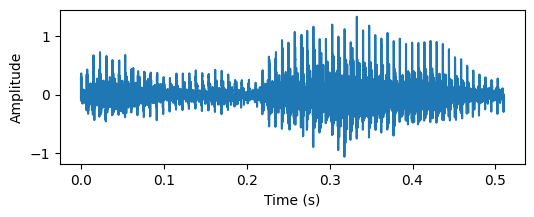

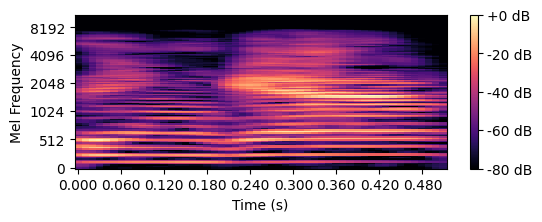


Category: day_2
Category Path: /content/drive/MyDrive/Trimmed_voices/day_2
Number of Audio Files: 89
Displaying audio info for a random file in day_2 category:


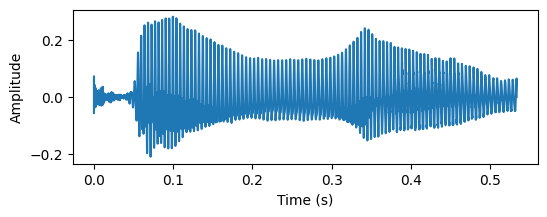

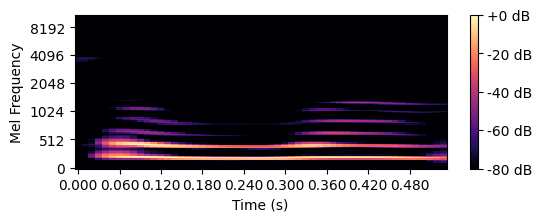


Category: day_3
Category Path: /content/drive/MyDrive/Trimmed_voices/day_3
Number of Audio Files: 76
Displaying audio info for a random file in day_3 category:


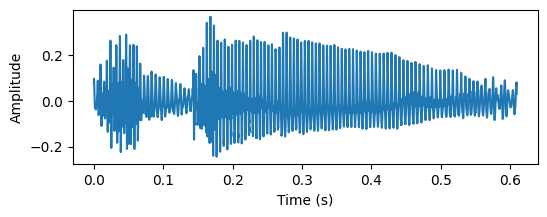

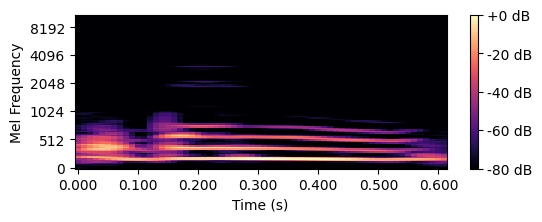


Category: day_4
Category Path: /content/drive/MyDrive/Trimmed_voices/day_4
Number of Audio Files: 103
Displaying audio info for a random file in day_4 category:


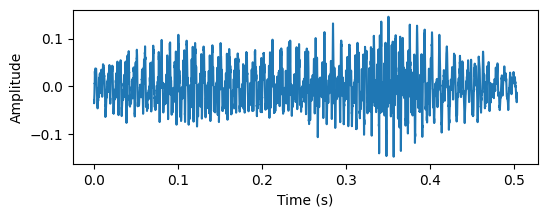

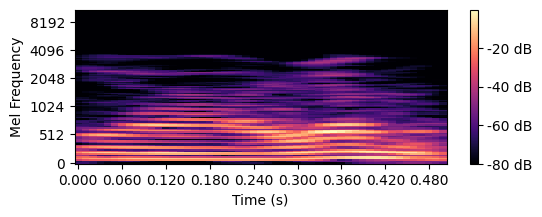


Category: day_5
Category Path: /content/drive/MyDrive/Trimmed_voices/day_5
Number of Audio Files: 181
Displaying audio info for a random file in day_5 category:


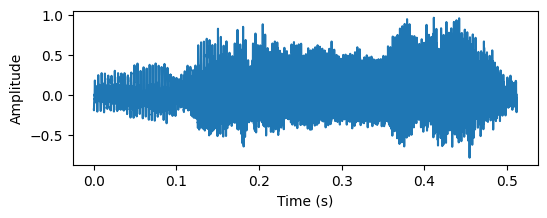

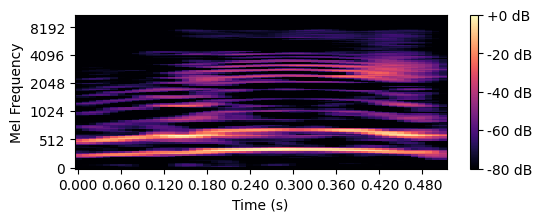


Category: day_6
Category Path: /content/drive/MyDrive/Trimmed_voices/day_6
Number of Audio Files: 141
Displaying audio info for a random file in day_6 category:


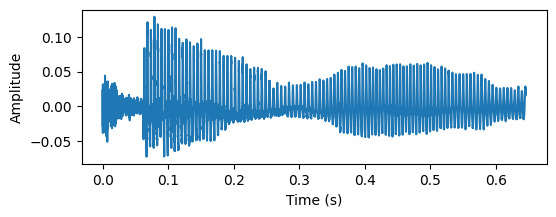

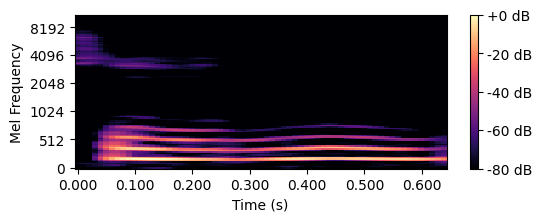


Category: day_7
Category Path: /content/drive/MyDrive/Trimmed_voices/day_7
Number of Audio Files: 179
Displaying audio info for a random file in day_7 category:


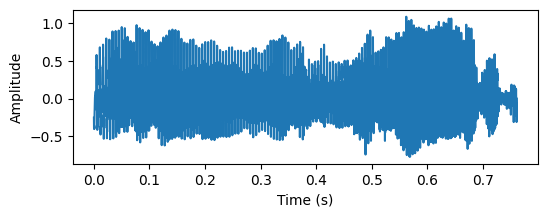

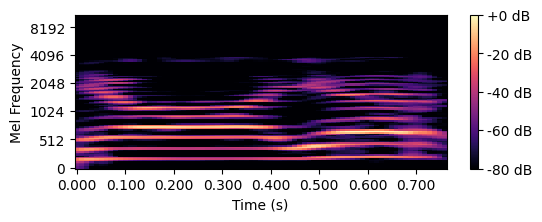

In [ ]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display# Function to plot audio waveform and spectrogram
def plot_audio_info(audio_data, sr, title, day_name):
    # Plot audio waveform
    plt.figure(figsize=(6, 2))
    plt.plot(np.arange(len(audio_data)) / sr, audio_data)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

    # Plot spectrogram with adjusted time scale
    plt.figure(figsize=(6, 2))
    hop_length = int(sr * 0.010)  # Choose hop length (in samples) for time axis
    librosa.display.specshow(librosa.amplitude_to_db(librosa.feature.melspectrogram(y=audio_data, sr=sr, hop_length=hop_length), ref=np.max), hop_length=hop_length, y_axis='mel', x_axis='time')
    plt.xlabel('Time (s)')
    plt.ylabel('Mel Frequency')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

    # Display play button
    display(Audio(data=audio_data, rate=sr))

# Iterate through selected categories
for category in selected_categories:
    category_path = os.path.join(main_dir, category)

    # Check if the category directory exists
    if not os.path.exists(category_path) or not os.path.isdir(category_path):
        print(f"Warning: {category} directory not found.")
        continue

    print(f"\nCategory: {category}")

    audio_files = [file for file in os.listdir(category_path) if file.endswith('.ogg')]

    # Print additional information for debugging
    print(f"Category Path: {category_path}")
    print(f"Number of Audio Files: {len(audio_files)}")

    # Check if there are any audio files
    if not audio_files:
        print(f"No audio files found in {category} category.")
    else:
        print(f"Displaying audio info for a random file in {category} category:")

        # Randomly select an audio file
        random_audio_file = np.random.choice(audio_files)

        # Load the audio data
        audio_data, sr = librosa.load(os.path.join(category_path, random_audio_file))

        # Plot audio waveform, spectrogram, and add a play button
        plot_audio_info(audio_data, sr, f"{category} - {random_audio_file}", category)


Category: day_1
Category Path: /content/drive/MyDrive/Trimmed_voices/day_1
Number of Audio Files: 102
Displaying audio info for a random file in day_1 category:


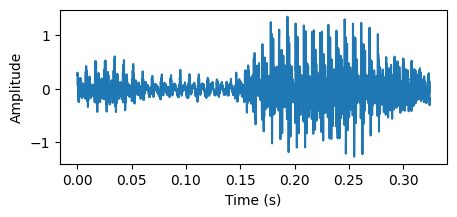

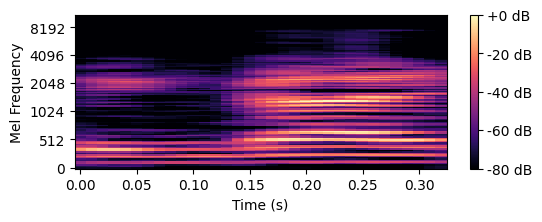


Category: day_2
Category Path: /content/drive/MyDrive/Trimmed_voices/day_2
Number of Audio Files: 89
Displaying audio info for a random file in day_2 category:


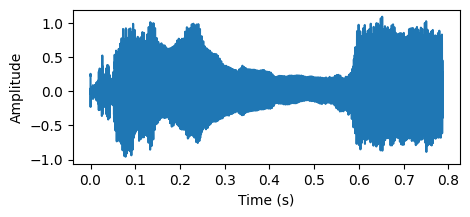

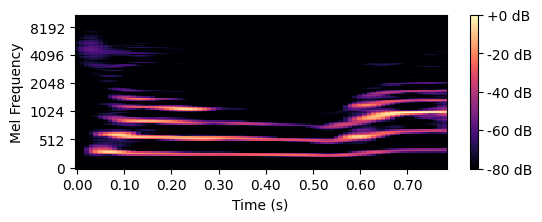


Category: day_3
Category Path: /content/drive/MyDrive/Trimmed_voices/day_3
Number of Audio Files: 76
Displaying audio info for a random file in day_3 category:


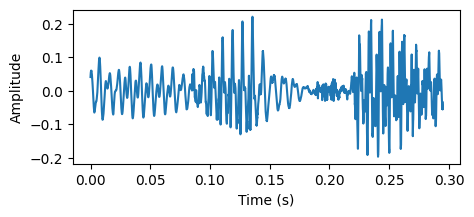

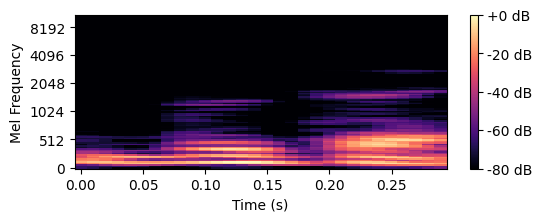


Category: day_4
Category Path: /content/drive/MyDrive/Trimmed_voices/day_4
Number of Audio Files: 103
Displaying audio info for a random file in day_4 category:


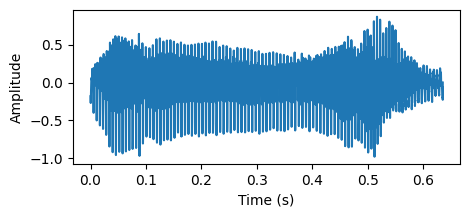

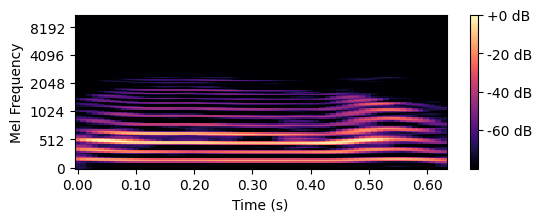


Category: day_5
Category Path: /content/drive/MyDrive/Trimmed_voices/day_5
Number of Audio Files: 181
Displaying audio info for a random file in day_5 category:


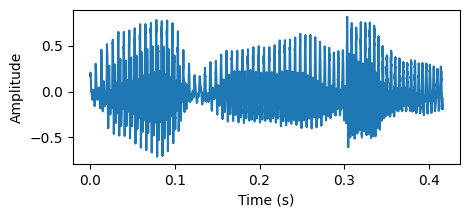

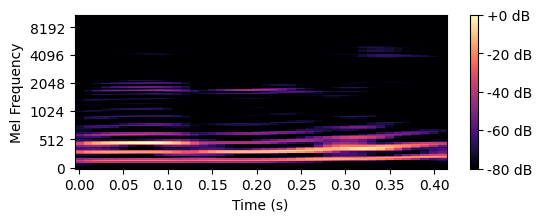


Category: day_6
Category Path: /content/drive/MyDrive/Trimmed_voices/day_6
Number of Audio Files: 141
Displaying audio info for a random file in day_6 category:


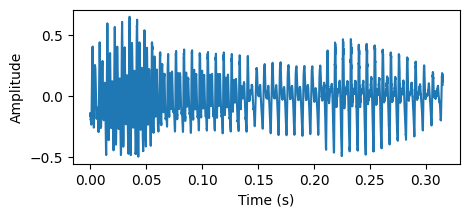

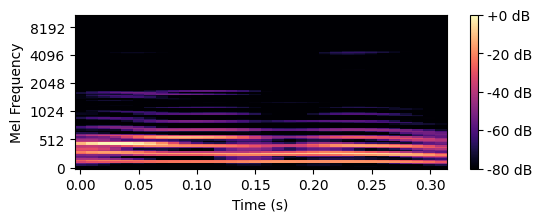


Category: day_7
Category Path: /content/drive/MyDrive/Trimmed_voices/day_7
Number of Audio Files: 179
Displaying audio info for a random file in day_7 category:


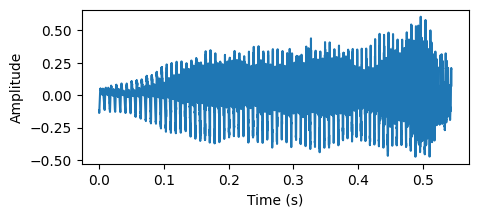

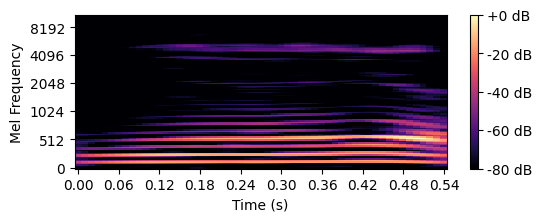

In [ ]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from IPython.display import Audio, display

# Define the main directory
main_dir = "/content/drive/MyDrive/Trimmed_voices"

# Selected categories
selected_categories = ['day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7']

# Function to plot audio waveform and spectrogram
def plot_audio_info(audio_data, sr, title, day_name):
    # Plot audio waveform
    plt.figure(figsize=(5, 2))
    plt.plot(np.arange(len(audio_data)) / sr, audio_data)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

    # Plot spectrogram with adjusted time scale
    plt.figure(figsize=(6, 2))
    hop_length = int(sr * 0.010)  # Choose hop length (in samples) for time axis
    spec = librosa.amplitude_to_db(librosa.feature.melspectrogram(y=audio_data, sr=sr, hop_length=hop_length), ref=np.max)
    librosa.display.specshow(spec, hop_length=hop_length, y_axis='mel', x_axis='time')
    plt.xlabel('Time (s)')
    plt.ylabel('Mel Frequency')
    plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.2f'))  # Format x-axis to 2 decimal points
    plt.colorbar(format='%+2.0f dB')
    plt.show()

    # Display play button
    display(Audio(data=audio_data, rate=sr))

# Iterate through selected categories
for category in selected_categories:
    category_path = os.path.join(main_dir, category)

    # Check if the category directory exists
    if not os.path.exists(category_path) or not os.path.isdir(category_path):
        print(f"Warning: {category} directory not found.")
        continue

    print(f"\nCategory: {category}")

    audio_files = [file for file in os.listdir(category_path) if file.endswith('.ogg')]

    # Print additional information for debugging
    print(f"Category Path: {category_path}")
    print(f"Number of Audio Files: {len(audio_files)}")

    # Check if there are any audio files
    if not audio_files:
        print(f"No audio files found in {category} category.")
    else:
        print(f"Displaying audio info for a random file in {category} category:")

        # Randomly select an audio file
        random_audio_file = np.random.choice(audio_files)

        # Load the audio data
        audio_data, sr = librosa.load(os.path.join(category_path, random_audio_file))

        # Plot audio waveform, spectrogram, and add a play button
        plot_audio_info(audio_data, sr, f"{category} - {random_audio_file}", category)



Category: day_1
Category Path: /content/drive/MyDrive/Trimmed_voices/day_1
Number of Audio Files: 102
Displaying audio info for a random file in day_1 category:


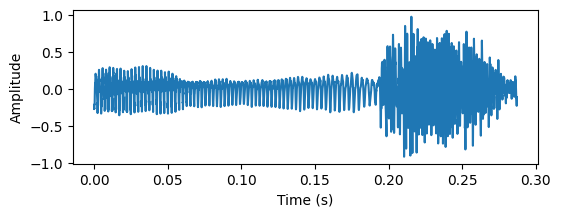

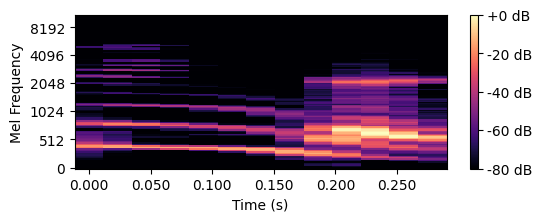


Category: day_2
Category Path: /content/drive/MyDrive/Trimmed_voices/day_2
Number of Audio Files: 89
Displaying audio info for a random file in day_2 category:


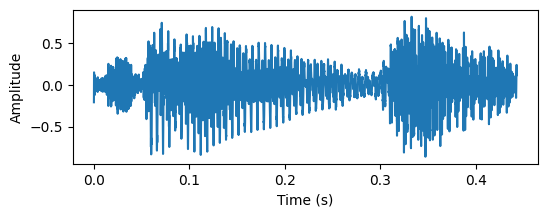

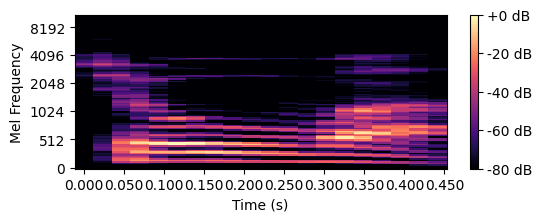


Category: day_3
Category Path: /content/drive/MyDrive/Trimmed_voices/day_3
Number of Audio Files: 76
Displaying audio info for a random file in day_3 category:


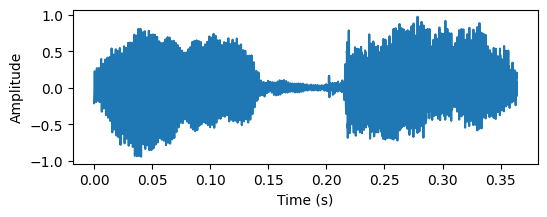

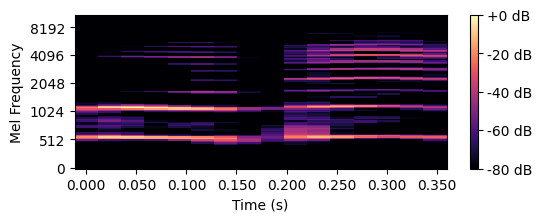


Category: day_4
Category Path: /content/drive/MyDrive/Trimmed_voices/day_4
Number of Audio Files: 103
Displaying audio info for a random file in day_4 category:


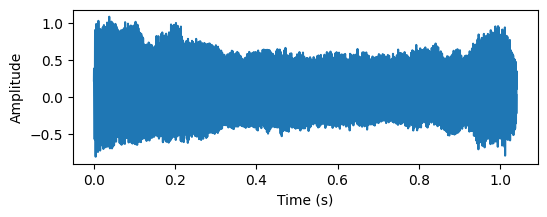

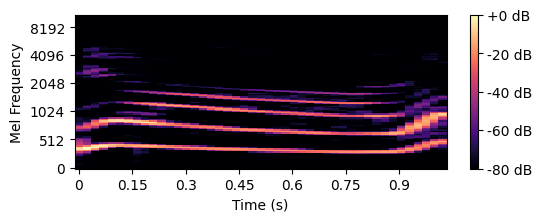


Category: day_5
Category Path: /content/drive/MyDrive/Trimmed_voices/day_5
Number of Audio Files: 181
Displaying audio info for a random file in day_5 category:


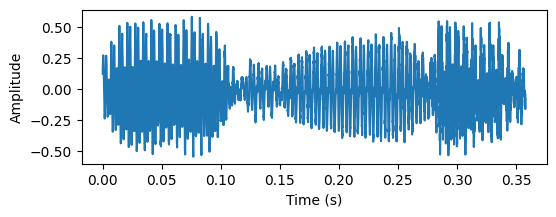

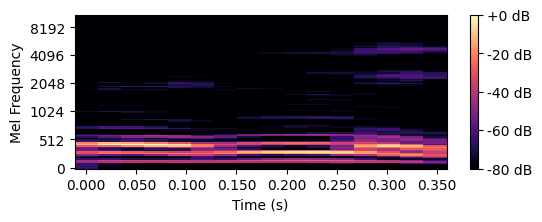


Category: day_6
Category Path: /content/drive/MyDrive/Trimmed_voices/day_6
Number of Audio Files: 141
Displaying audio info for a random file in day_6 category:


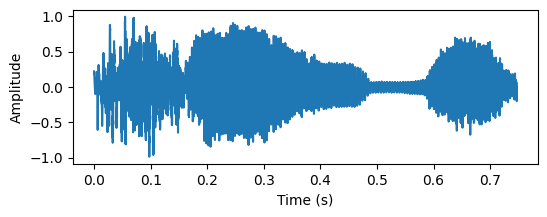

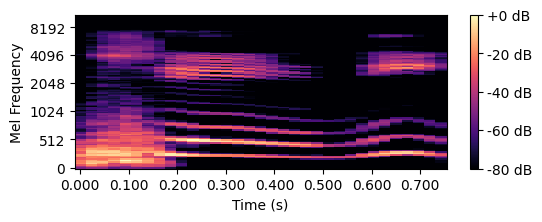


Category: day_7
Category Path: /content/drive/MyDrive/Trimmed_voices/day_7
Number of Audio Files: 179
Displaying audio info for a random file in day_7 category:


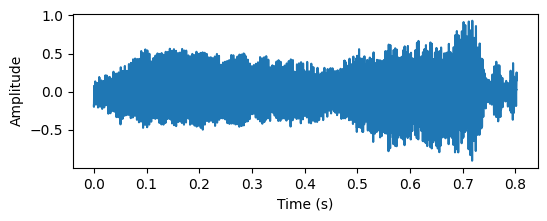

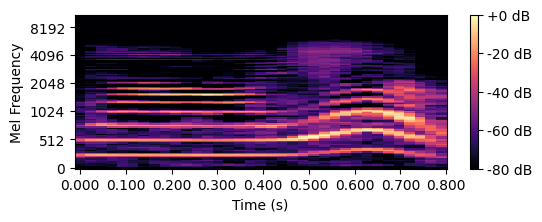

In [ ]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display

# Define the main directory
main_dir = "/content/drive/MyDrive/Trimmed_voices"

# Selected categories
selected_categories = ['day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7']

# Function to plot audio waveform and spectrogram
def plot_audio_info(audio_data, sr, title, day_name):
    # Plot audio waveform
    plt.figure(figsize=(6, 2))
    plt.plot(np.arange(len(audio_data)) / sr, audio_data)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

    # Plot spectrogram
    plt.figure(figsize=(6, 2))
    librosa.display.specshow(librosa.amplitude_to_db(librosa.feature.melspectrogram(y=audio_data, sr=sr), ref=np.max), y_axis='mel', x_axis='time')
    plt.xlabel('Time (s)')
    plt.ylabel('Mel Frequency')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

    # Display play button
    display(Audio(data=audio_data, rate=sr))

# Iterate through selected categories
for category in selected_categories:
    category_path = os.path.join(main_dir, category)

    # Check if the category directory exists
    if not os.path.exists(category_path) or not os.path.isdir(category_path):
        print(f"Warning: {category} directory not found.")
        continue

    print(f"\nCategory: {category}")

    audio_files = [file for file in os.listdir(category_path) if file.endswith('.ogg')]

    # Print additional information for debugging
    print(f"Category Path: {category_path}")
    print(f"Number of Audio Files: {len(audio_files)}")

    # Check if there are any audio files
    if not audio_files:
        print(f"No audio files found in {category} category.")
    else:
        print(f"Displaying audio info for a random file in {category} category:")

        # Randomly select an audio file
        random_audio_file = np.random.choice(audio_files)

        # Load the audio data
        audio_data, sr = librosa.load(os.path.join(category_path, random_audio_file))

        # Plot audio waveform, spectrogram, and add a play button
        plot_audio_info(audio_data, sr, f"{category} - {random_audio_file}", category)

Moments for each category: {'day_1': {'mean': 0.5835047, 'variance': 0.0779923, 'skewness': 0.31604182601898084, 'kurtosis': -0.6668434604715374}, 'day_2': {'mean': 0.6205388, 'variance': 0.08791126, 'skewness': 0.17785392938731667, 'kurtosis': -0.7830146682812615}, 'day_3': {'mean': 0.5750483, 'variance': 0.09107708, 'skewness': 0.09709091278656141, 'kurtosis': -1.3142757202769888}, 'day_4': {'mean': 0.59598505, 'variance': 0.09892723, 'skewness': 0.21034197459835652, 'kurtosis': -1.0141100681122366}, 'day_5': {'mean': 0.5539281, 'variance': 0.09347178, 'skewness': 0.4691946173941851, 'kurtosis': -0.10858146791606194}, 'day_6': {'mean': 0.55745864, 'variance': 0.082400806, 'skewness': 0.30062808893059817, 'kurtosis': -0.7571064050645697}, 'day_7': {'mean': 0.62139404, 'variance': 0.098452054, 'skewness': 0.015467431675914375, 'kurtosis': -0.8593749254808887}}


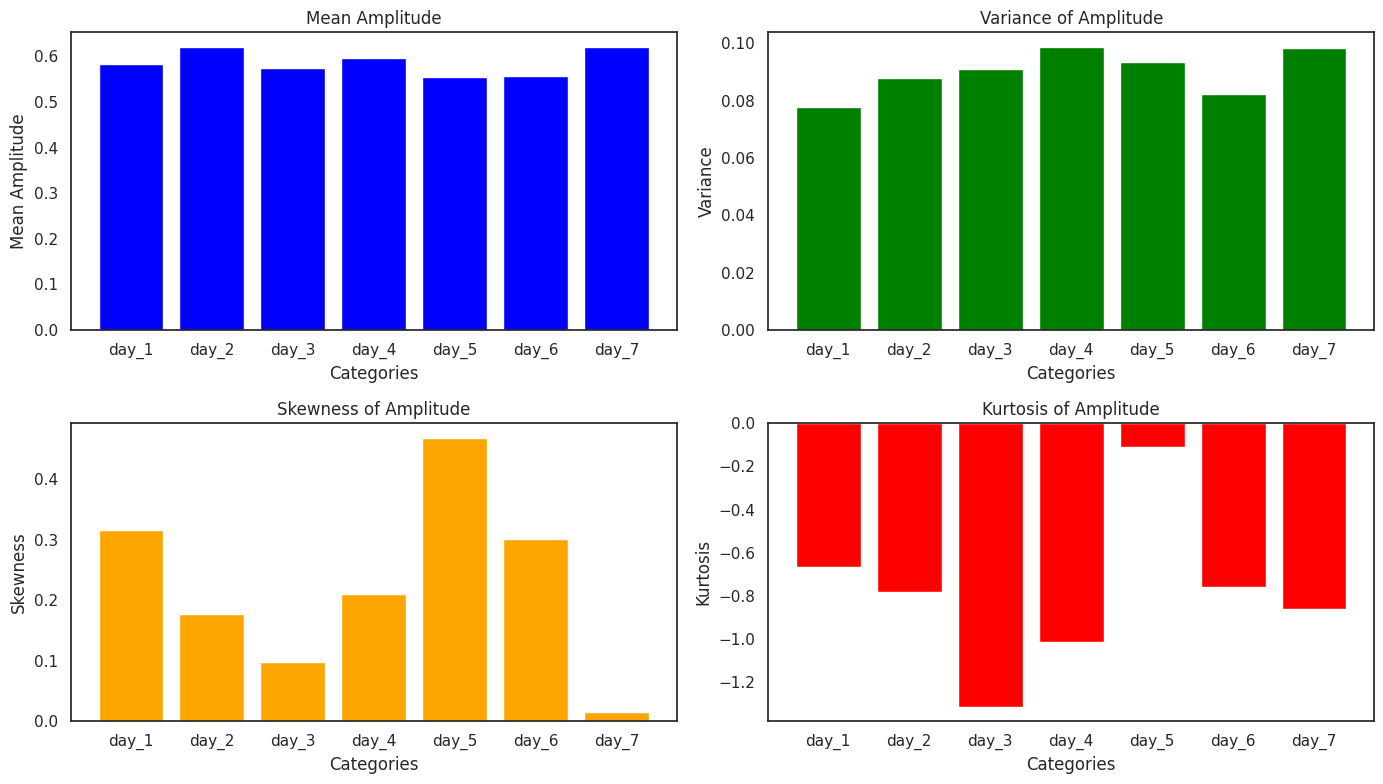

In [ ]:
import os
import numpy as np
from scipy.stats import skew, kurtosis
import librosa
import matplotlib.pyplot as plt

dataset_root = "/content/drive/MyDrive/voices"

# List of categories
categories = ['day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7']

moments = {}

# Iterate through categories
for category in categories:
    category_path = os.path.join(dataset_root, category)
    amplitudes = []

    # Iterate through audio files in the current category
    for filename in os.listdir(category_path):
        if filename.endswith('.ogg'):
            file_path = os.path.join(category_path, filename)
            audio_data, sr = librosa.load(file_path, sr=None)
            max_amplitude = np.max(np.abs(audio_data))
            amplitudes.append(max_amplitude)

    # Calculate moments
    moments[category] = {
        'mean': np.mean(amplitudes),
        'variance': np.var(amplitudes),
        'skewness': skew(amplitudes),
        'kurtosis': kurtosis(amplitudes)
    }

# Print the calculated moments for all categories
print("Moments for each category:", moments)

# Extract category names and moments
mean_values = [moments[category]['mean'] for category in categories]
variance_values = [moments[category]['variance'] for category in categories]
skewness_values = [moments[category]['skewness'] for category in categories]
kurtosis_values = [moments[category]['kurtosis'] for category in categories]

# Plotting
plt.figure(figsize=(14, 8))

# Mean
plt.subplot(2, 2, 1)
plt.bar(categories, mean_values, color='blue')
plt.title('Mean Amplitude')
plt.xlabel('Categories')
plt.ylabel('Mean Amplitude')

# Variance
plt.subplot(2, 2, 2)
plt.bar(categories, variance_values, color='green')
plt.title('Variance of Amplitude')
plt.xlabel('Categories')
plt.ylabel('Variance')

# Skewness
plt.subplot(2, 2, 3)
plt.bar(categories, skewness_values, color='orange')
plt.title('Skewness of Amplitude')
plt.xlabel('Categories')
plt.ylabel('Skewness')

# Kurtosis
plt.subplot(2, 2, 4)
plt.bar(categories, kurtosis_values, color='red')
plt.title('Kurtosis of Amplitude')
plt.xlabel('Categories')
plt.ylabel('Kurtosis')

plt.tight_layout()
plt.show()

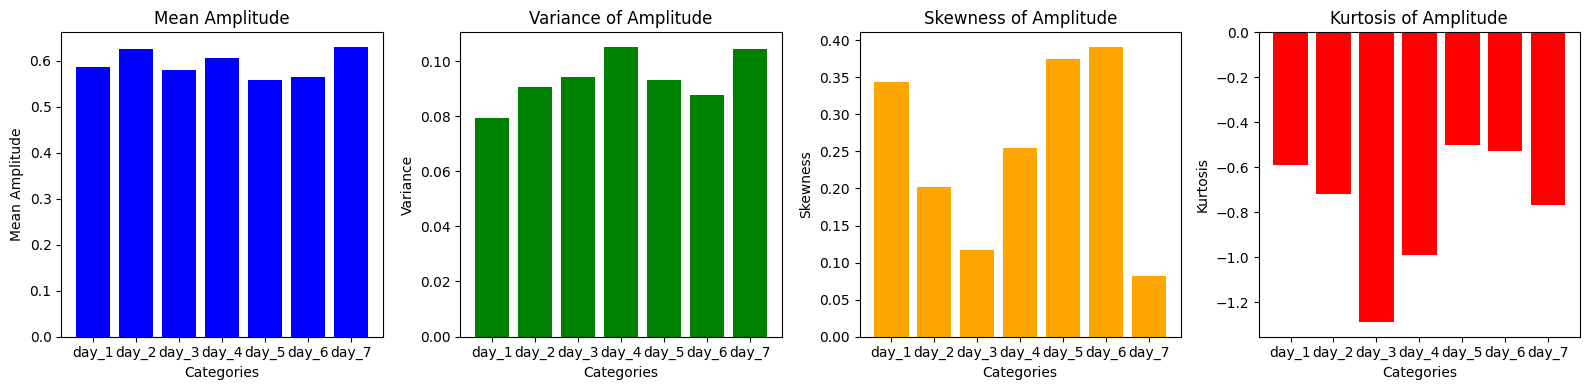

In [ ]:
import os
import numpy as np
from scipy.stats import skew, kurtosis
import librosa
import matplotlib.pyplot as plt

dataset_root = "/content/drive/MyDrive/Trimmed_voices"

# List of categories
categories = ['day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7']

moments = {}

# Iterate through categories
for category in categories:
    category_path = os.path.join(dataset_root, category)
    amplitudes = []

    # Iterate through audio files in the current category
    for filename in os.listdir(category_path):
        if filename.endswith('.ogg'):
            file_path = os.path.join(category_path, filename)
            audio_data, sr = librosa.load(file_path, sr=None)
            max_amplitude = np.max(np.abs(audio_data))
            amplitudes.append(max_amplitude)

    # Calculate moments
    moments[category] = {
        'mean': np.mean(amplitudes),
        'variance': np.var(amplitudes),
        'skewness': skew(amplitudes),
        'kurtosis': kurtosis(amplitudes)
    }

# Extract category names and moments
mean_values = [moments[category]['mean'] for category in categories]
variance_values = [moments[category]['variance'] for category in categories]
skewness_values = [moments[category]['skewness'] for category in categories]
kurtosis_values = [moments[category]['kurtosis'] for category in categories]

# Plotting
plt.figure(figsize=(16, 4))

# Mean
plt.subplot(1, 4, 1)
plt.bar(categories, mean_values, color='blue')
plt.title('Mean Amplitude')
plt.xlabel('Categories')
plt.ylabel('Mean Amplitude')

# Variance
plt.subplot(1, 4, 2)
plt.bar(categories, variance_values, color='green')
plt.title('Variance of Amplitude')
plt.xlabel('Categories')
plt.ylabel('Variance')

# Skewness
plt.subplot(1, 4, 3)
plt.bar(categories, skewness_values, color='orange')
plt.title('Skewness of Amplitude')
plt.xlabel('Categories')
plt.ylabel('Skewness')

# Kurtosis
plt.subplot(1, 4, 4)
plt.bar(categories, kurtosis_values, color='red')
plt.title('Kurtosis of Amplitude')
plt.xlabel('Categories')
plt.ylabel('Kurtosis')

plt.tight_layout()
plt.show()


Moments for each category: {'day_1': {'mean': 0.5872643, 'variance': 0.07938282, 'skewness': 0.3440566655661695, 'kurtosis': -0.5888557076605321}, 'day_2': {'mean': 0.6250996, 'variance': 0.090444215, 'skewness': 0.20148920979502039, 'kurtosis': -0.718622435126266}, 'day_3': {'mean': 0.5795657, 'variance': 0.09424325, 'skewness': 0.11756523292622226, 'kurtosis': -1.2892791098496552}, 'day_4': {'mean': 0.60518885, 'variance': 0.10520542, 'skewness': 0.25454278337530223, 'kurtosis': -0.9885739746407634}, 'day_5': {'mean': 0.55696636, 'variance': 0.09323885, 'skewness': 0.37501766136349296, 'kurtosis': -0.49910768073352463}, 'day_6': {'mean': 0.5642206, 'variance': 0.08776835, 'skewness': 0.3913249563365768, 'kurtosis': -0.5300143951979139}, 'day_7': {'mean': 0.63017833, 'variance': 0.10423341, 'skewness': 0.0815412954053725, 'kurtosis': -0.7686084458746025}}


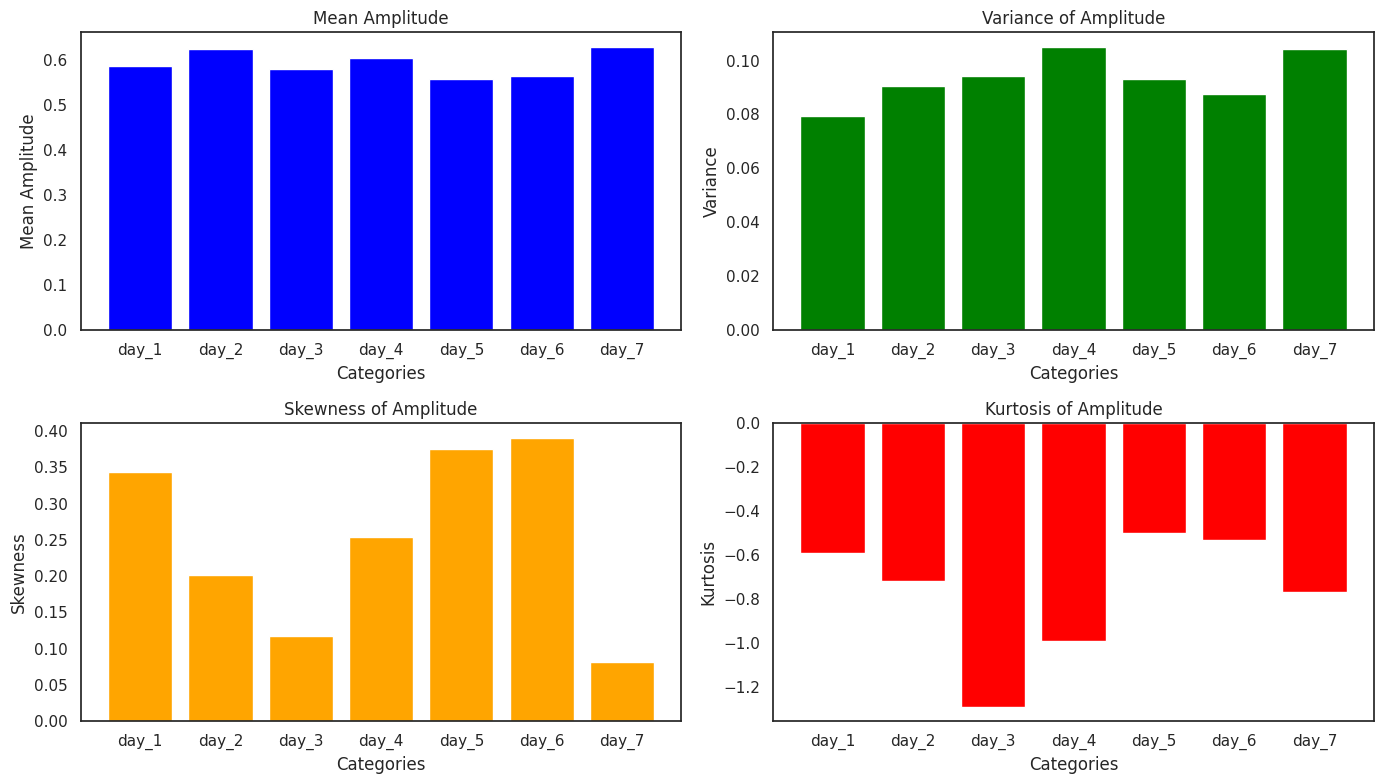

In [ ]:
import os
import numpy as np
from scipy.stats import skew, kurtosis
import librosa
import matplotlib.pyplot as plt

dataset_root = "/content/drive/MyDrive/Trimmed_voices"

# List of categories
categories = ['day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7']

moments = {}

# Iterate through categories
for category in categories:
    category_path = os.path.join(dataset_root, category)
    amplitudes = []

    # Iterate through audio files in the current category
    for filename in os.listdir(category_path):
        if filename.endswith('.ogg'):
            file_path = os.path.join(category_path, filename)
            audio_data, sr = librosa.load(file_path, sr=None)
            max_amplitude = np.max(np.abs(audio_data))
            amplitudes.append(max_amplitude)

    # Calculate moments
    moments[category] = {
        'mean': np.mean(amplitudes),
        'variance': np.var(amplitudes),
        'skewness': skew(amplitudes),
        'kurtosis': kurtosis(amplitudes)
    }

# Print the calculated moments for all categories
print("Moments for each category:", moments)

# Extract category names and moments
mean_values = [moments[category]['mean'] for category in categories]
variance_values = [moments[category]['variance'] for category in categories]
skewness_values = [moments[category]['skewness'] for category in categories]
kurtosis_values = [moments[category]['kurtosis'] for category in categories]

# Plotting
plt.figure(figsize=(14, 8))

# Mean
plt.subplot(2, 2, 1)
plt.bar(categories, mean_values, color='blue')
plt.title('Mean Amplitude')
plt.xlabel('Categories')
plt.ylabel('Mean Amplitude')

# Variance
plt.subplot(2, 2, 2)
plt.bar(categories, variance_values, color='green')
plt.title('Variance of Amplitude')
plt.xlabel('Categories')
plt.ylabel('Variance')

# Skewness
plt.subplot(2, 2, 3)
plt.bar(categories, skewness_values, color='orange')
plt.title('Skewness of Amplitude')
plt.xlabel('Categories')
plt.ylabel('Skewness')

# Kurtosis
plt.subplot(2, 2, 4)
plt.bar(categories, kurtosis_values, color='red')
plt.title('Kurtosis of Amplitude')
plt.xlabel('Categories')
plt.ylabel('Kurtosis')

plt.tight_layout()
plt.show()

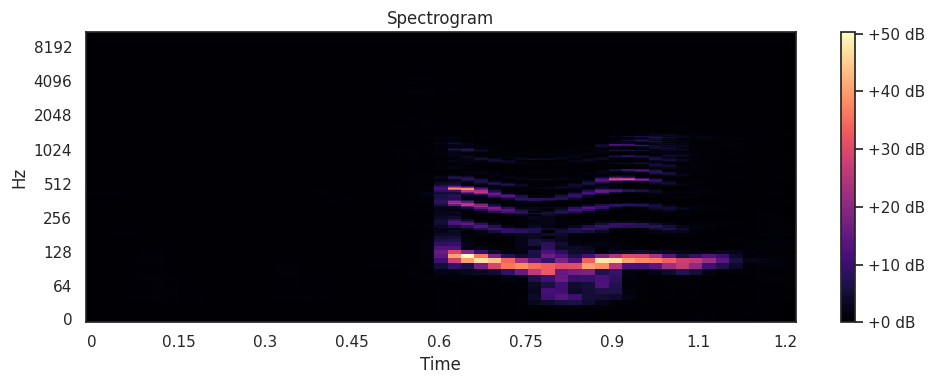

In [ ]:
#visualising the spectrogram of just one audio

audio_path = "/content/drive/MyDrive/voices/day_2/WhatsApp Audio 2023-09-01 at 12.26.54 AM (1).ogg"



y, sr = librosa.load(audio_path)

D = np.abs(librosa.stft(y))

# Ploting the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.tight_layout()

plt.show()
ipd.Audio(audio_path)

In [ ]:
import os
import numpy as np
from scipy.stats import skew, kurtosis
import librosa

dataset_root = "/content/drive/MyDrive/Trimmed_voices"

# List of categories
categories = ['day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7']

moments = {}

# Iterate through categories
for category in categories:
    category_path = os.path.join(dataset_root, category)
    durations = []

    # Iterate through audio files in the current category
    for filename in os.listdir(category_path):
        if filename.endswith('.ogg'):
            file_path = os.path.join(category_path, filename)
            # print("Loading:", file_path)  # Debugging print statement
            audio_data, sr = librosa.load(file_path, sr=None)
            duration = librosa.get_duration(y=audio_data, sr=sr)
            durations.append(duration)

    # Calculate moments
    moments[category] = {
        'mean': np.mean(durations),
        'variance': np.var(durations),
        'skewness': skew(durations),
        'kurtosis': kurtosis(durations)
    }

# Print the calculated moments for all categories
print("Moments for each category:", moments)


Moments for each category: {'day_1': {'mean': 0.5663100490196079, 'variance': 0.045711209399629936, 'skewness': 2.240252000209721, 'kurtosis': 9.238631557855076}, 'day_2': {'mean': 0.5519051966292134, 'variance': 0.0294301660035428, 'skewness': 0.7902622854927507, 'kurtosis': -0.0988035083297274}, 'day_3': {'mean': 0.4955953947368421, 'variance': 0.06098208948125866, 'skewness': 2.6472504610432797, 'kurtosis': 9.593723217007113}, 'day_4': {'mean': 0.6409836165048545, 'variance': 0.05476292574037963, 'skewness': 1.147708792447405, 'kurtosis': 1.7674564578273317}, 'day_5': {'mean': 0.6029727209944752, 'variance': 0.05627963964345945, 'skewness': 1.5744294098110811, 'kurtosis': 4.765433628993689}, 'day_6': {'mean': 0.5570970744680852, 'variance': 0.05390825124254942, 'skewness': 1.8388029680940732, 'kurtosis': 4.956013568884888}, 'day_7': {'mean': 0.6345457402234637, 'variance': 0.07257694267476632, 'skewness': 1.9005383864311096, 'kurtosis': 5.14993145882638}}


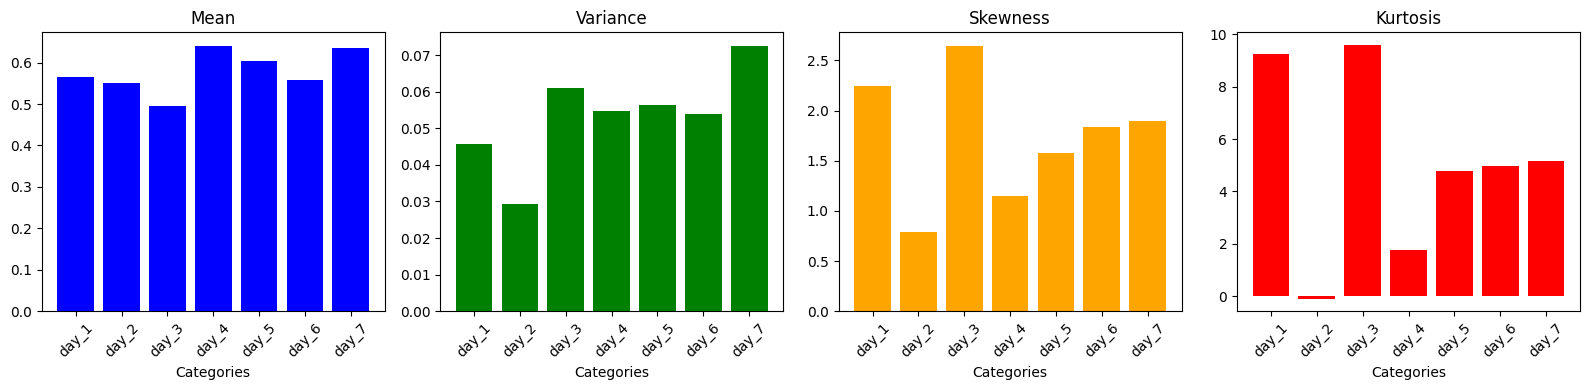

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Assuming you have already calculated moments for each category (as 'moments' dictionary)
categories = ['day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7']

mean_values = [moments[category]['mean'] for category in categories]
variance_values = [moments[category]['variance'] for category in categories]
skewness_values = [moments[category]['skewness'] for category in categories]
kurtosis_values = [moments[category]['kurtosis'] for category in categories]

# Define colors for each statistic
colors = ['blue', 'green', 'orange', 'red']

plt.figure(figsize=(16, 4))

# Mean
plt.subplot(1, 4, 1)
plt.bar(categories, mean_values, color=colors[0])
plt.title('Mean')
plt.xlabel('Categories')
plt.xticks(rotation=45)

# Variance
plt.subplot(1, 4, 2)
plt.bar(categories, variance_values, color=colors[1])
plt.title('Variance')
plt.xlabel('Categories')
plt.xticks(rotation=45)

# Skewness
plt.subplot(1, 4, 3)
plt.bar(categories, skewness_values, color=colors[2])
plt.title('Skewness')
plt.xlabel('Categories')
plt.xticks(rotation=45)

# Kurtosis
plt.subplot(1, 4, 4)
plt.bar(categories, kurtosis_values, color=colors[3])
plt.title('Kurtosis')
plt.xlabel('Categories')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### **TRIMMING**

In [ ]:
import os
import numpy as np
import soundfile as sf
import librosa
from tqdm import tqdm

# Function to trim audio to a specified percentage from both start and end
def trim_audio(audio, percentage_start, percentage_end):
    trimmed_audio_start = trim_percentage_of_max_amplitude(audio, percentage_start)
    trimmed_audio_end = trim_percentage_from_end(trimmed_audio_start, percentage_end)
    return trimmed_audio_end

# Define trimming functions
def trim_percentage_of_max_amplitude(audio, percentage=10):
    max_amplitude = np.max(np.abs(audio))
    threshold = percentage / 100.0 * max_amplitude

    # Find the indices where the amplitude is above the threshold
    above_threshold_indices = np.where(np.abs(audio) >= threshold)[0]

    if len(above_threshold_indices) == 0:
        # No samples above the threshold, return an array of zeros
        return np.zeros_like(audio)

    # Find the index of the first sample above the threshold
    first_above_threshold_index = above_threshold_indices[0]

    # Trim the audio until the first instance above the threshold
    trimmed_audio = audio[first_above_threshold_index:]

    return trimmed_audio

def trim_percentage_from_end(audio, percentage=10):
    # Reverse the audio and trim based on the specified percentage
    reversed_audio = np.flip(audio)
    trimmed_audio_reversed = trim_percentage_of_max_amplitude(reversed_audio, percentage)

    # Reverse back to get the correct order
    trimmed_audio = np.flip(trimmed_audio_reversed)

    return trimmed_audio

# Define paths
data_dir = "/content/drive/MyDrive/voices"
output_dir = "/content/drive/MyDrive/Trimmed_voices"

# Trim percentages
percentage_start = 20
percentage_end = 20

# Loop through the main directory
for category in os.listdir(data_dir):
    category_dir = os.path.join(data_dir, category)
    output_category_dir = os.path.join(output_dir, category)

    # Create output directory if it doesn't exist
    os.makedirs(output_category_dir, exist_ok=True)

    # Loop through audio files
    for audio_file in tqdm(os.listdir(category_dir)):
        if audio_file.endswith('.ogg'):
            audio_path = os.path.join(category_dir, audio_file)
            output_audio_path_base = os.path.join(output_category_dir, os.path.splitext(audio_file)[0])

            try:
                # Load the audio file using librosa
                audio_data, sr = librosa.load(audio_path, sr=None)

                # Check if audio_data is a NumPy array
                if isinstance(audio_data, np.ndarray):

                    # Trim the audio based on the specified percentages
                    trimmed_audio = trim_audio(audio_data, percentage_start, percentage_end)

                    # Save the trimmed audio file
                    output_trimmed_audio_path = f'{output_audio_path_base}_trimmed.ogg'
                    sf.write(output_trimmed_audio_path, trimmed_audio, sr)
                else:
                    print(f"Skipping {audio_file}. Unable to load as NumPy array.")
            except Exception as e:
                print(f"Error processing {audio_file}: {e}")

print("Processing complete!")

100%|██████████| 179/179 [00:03<00:00, 46.28it/s]

Processing complete!


Category: day_1


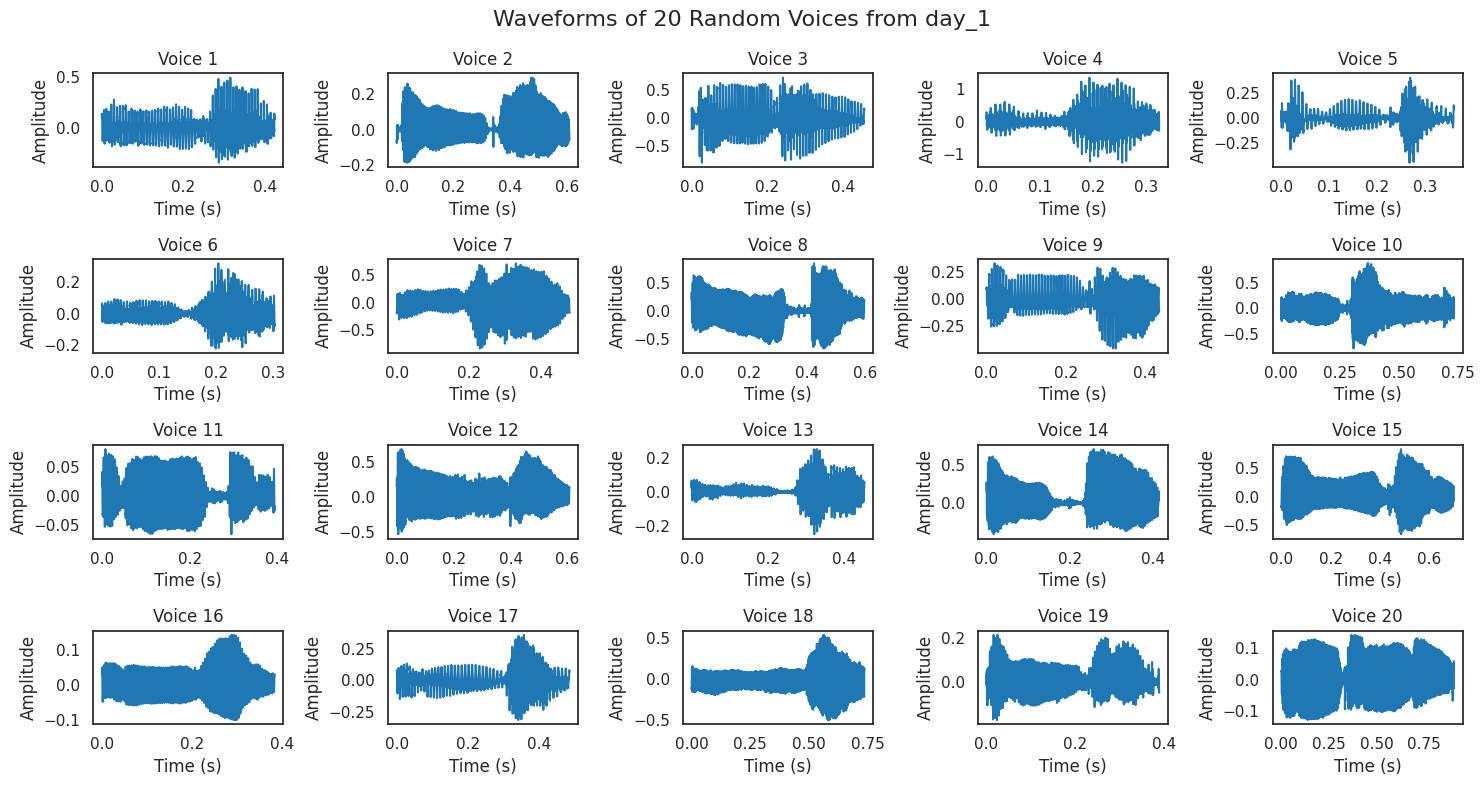

In [ ]:
import os
import numpy as np
import soundfile as sf
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio, display
import random

# Define paths
data_dir = "/content/drive/MyDrive/Trimmed_voices"
category = "day_1"

category_dir = os.path.join(data_dir, category)

# Check if the category directory exists
if not os.path.exists(category_dir) or not os.path.isdir(category_dir):
    print(f"Error: {category} directory not found.")
else:
    print(f"Category: {category}")

    audio_files = [file for file in os.listdir(category_dir) if file.endswith('.ogg')]

    # Check if there are any audio files
    if not audio_files:
        print(f"No audio files found in {category} category.")
    else:
        # Select 20 random audio files
        selected_files = random.sample(audio_files, 20)

        # Plot waveforms
        plt.figure(figsize=(15, 8))
        plt.suptitle(f'Waveforms of 20 Random Voices from {category}', fontsize=16)

        for i, audio_file in enumerate(selected_files, 1):
            audio_path = os.path.join(category_dir, audio_file)
            audio_data, sr = librosa.load(audio_path, sr=None)

            plt.subplot(4, 5, i)
            plt.plot(np.arange(len(audio_data)) / sr, audio_data)
            plt.title(f'Voice {i}')
            plt.xlabel('Time (s)')
            plt.ylabel('Amplitude')

            # Display the audio playback widget
            display(Audio(data=audio_data, rate=sr))

        plt.tight_layout()
        plt.show()


In [ ]:
import os

# Define the main directory
main_dir = "/content/drive/MyDrive/Trimmed_voices"

# Selected categories
selected_categories = ['day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7']

# Iterate through selected categories
for category in selected_categories:
    category_path = os.path.join(main_dir, category)

    # Check if the category directory exists
    if not os.path.exists(category_path) or not os.path.isdir(category_path):
        print(f"Warning: {category} directory not found.")
        continue

    print(f"Category: {category}")

    audio_files = [file for file in os.listdir(category_path) if file.endswith('.ogg')]

    # Print the number of audio files in each category
    print(f"Number of audio files in {category} category: {len(audio_files)}")

    print()

Category: day_1
Number of audio files in day_1 category: 102

Category: day_2
Number of audio files in day_2 category: 89

Category: day_3
Number of audio files in day_3 category: 76

Category: day_4
Number of audio files in day_4 category: 103

Category: day_5
Number of audio files in day_5 category: 181

Category: day_6
Number of audio files in day_6 category: 141

Category: day_7
Number of audio files in day_7 category: 179



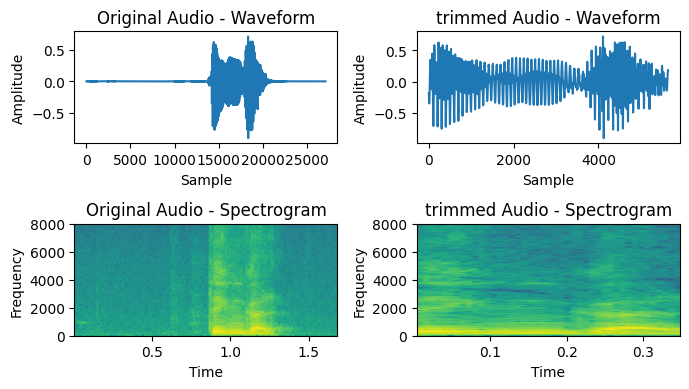

Original Audio:


trimmed Audio:


In [ ]:
import librosa
import os
import soundfile as sf
import numpy as np
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt

# Define the paths
data_dir = "/content/drive/MyDrive/voices"
trimmed_dir = "/content/drive/MyDrive/Trimmed_voices"

# Select a category and audio file for comparison
selected_category = "day_1"
selected_audio_file = "WhatsApp Ptt 2023-08-31 at 12.53.00 AM.ogg"  # Replace with the actual audio file name

# Load the original andtrimmed  audio
original_audio_path = os.path.join(data_dir, selected_category, selected_audio_file)
trimmed_audio_path = os.path.join(trimmed_dir, selected_category,"WhatsApp Ptt 2023-08-31 at 12.53.00 AM_trimmed.ogg")

original_audio, sr_original = sf.read(original_audio_path)
trimmed_audio, sr_trimmed = sf.read(trimmed_audio_path)

# Plot waveforms
plt.figure(figsize=(7, 4))

plt.subplot(2, 2, 1)
plt.title("Original Audio - Waveform")
plt.plot(original_audio)
plt.xlabel("Sample")
plt.ylabel("Amplitude")

plt.subplot(2, 2, 2)
plt.title("trimmed Audio - Waveform")
plt.plot(trimmed_audio)
plt.xlabel("Sample")
plt.ylabel("Amplitude")

# Plot spectrograms
plt.subplot(2, 2, 3)
plt.specgram(original_audio, Fs=sr_original)
plt.title("Original Audio - Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency")

plt.subplot(2, 2, 4)
plt.specgram(trimmed_audio, Fs=sr_trimmed)
plt.title("trimmed Audio - Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Play the original audio
print("Original Audio:")
ipd.display(ipd.Audio(original_audio, rate=sr_original))

# Play the augmented audio
print("trimmed Audio:")
ipd.display(ipd.Audio(trimmed_audio, rate=sr_trimmed))


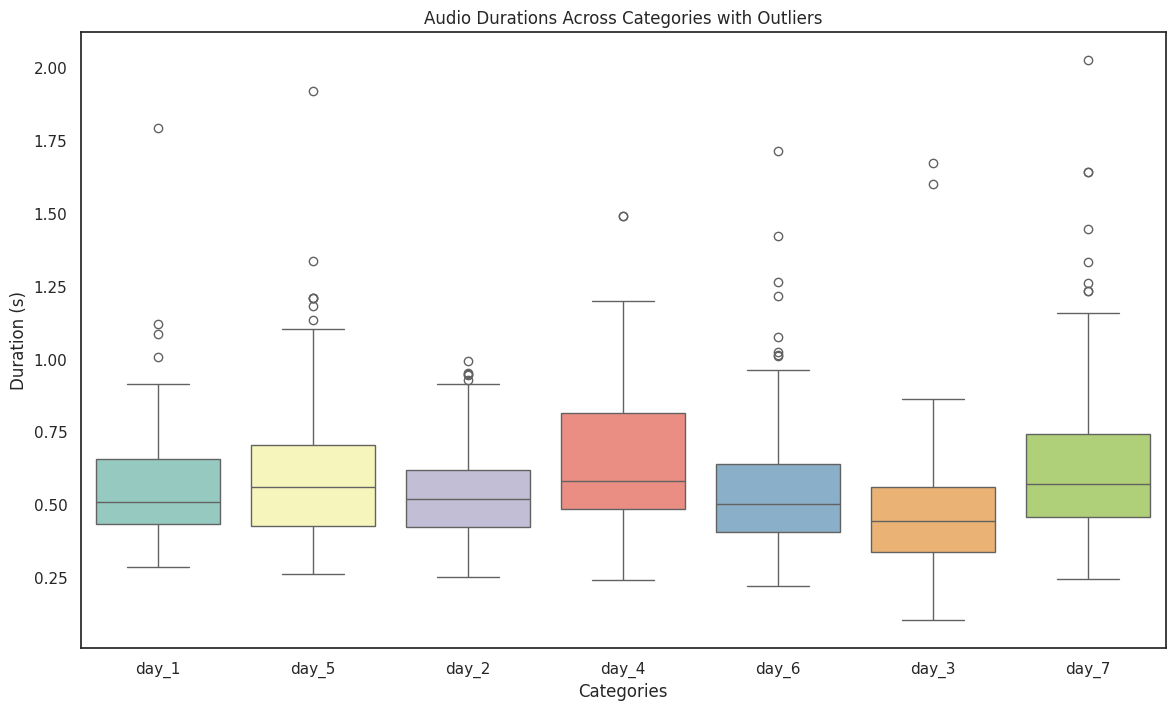

In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate duration from audio file
def calculate_duration(audio_path):
    audio, _ = librosa.load(audio_path)
    duration = librosa.get_duration(y=audio)
    return duration

# Directory containing audio files
audio_dir = '/content/drive/MyDrive/Trimmed_voices'

# List to store duration values for each category
all_durations = []
category_labels = []

# Iterate through audio files and calculate durations
for category in os.listdir(audio_dir):
    category_path = os.path.join(audio_dir, category)
    if os.path.isdir(category_path):
        durations = [calculate_duration(os.path.join(category_path, filename)) for filename in os.listdir(category_path) if filename.endswith('.ogg')]
        all_durations.extend(durations)
        category_labels.extend([category] * len(durations))

# Creimport os
import librosa
import numpy as np
import shutil
import seaborn as sns
import matplotlib.pyplot as plt

# Function to calculate duration from audio file
def calculate_duration(audio_path):
    audio, _ = librosa.load(audio_path)
    duration = librosa.get_duration(y=audio)
    return duration

# Function to identify and remove outliers
def remove_outliers(audio_dir, output_dir):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # List to store duration values for each category
    all_durations = []
    category_labels = []

    # Iterate through audio files and calculate durations
    for category in os.listdir(audio_dir):
        category_path = os.path.join(audio_dir, category)
        if os.path.isdir(category_path):
            durations = [calculate_duration(os.path.join(category_path, filename)) for filename in os.listdir(category_path) if filename.endswith('.ogg')]
            all_durations.extend(durations)
            category_labels.extend([category] * len(durations))

    # Create a boxplot to identify outliers
    plt.figure(figsize=(14, 8))
    sns.boxplot(x=category_labels, y=all_durations, palette="Set3", showfliers=True)
    plt.title('Audio Durations Across Categories with Outliers')
    plt.xlabel('Categories')
    plt.ylabel('Duration (s)')
    plt.show()

    # Define a criterion for identifying outliers (e.g., based on interquartile range)
    q1, q3 = np.percentile(all_durations, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Filter out outliers and save cleaned audio files
    for category in os.listdir(audio_dir):
        category_path = os.path.join(audio_dir, category)
        output_category_path = os.path.join(output_dir, category)

        if os.path.isdir(category_path):
            os.makedirs(output_category_path, exist_ok=True)

            for filename in os.listdir(category_path):
                if filename.endswith('.ogg'):
                    audio_path = os.path.join(category_path, filename)
                    duration = calculate_duration(audio_path)

                    # Check if the duration is within the bounds (not an outlier)
                    if lower_bound <= duration <= upper_bound:
                        # Copy the audio file to the new directory
                        shutil.copy(audio_path, os.path.join(output_category_path, filename))

# Define input and output directories
input_audio_dir = '/content/drive/MyDrive/Trimmed_voices'
output_cleaned_dir = '/content/drive/MyDrive/Cleaned_voices'

# Remove outliers and save cleaned audio files
remove_outliers(input_audio_dir, output_cleaned_dir)


<ipython-input-2-ebed6818b86f>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category_labels, y=all_durations, palette="Set3", showfliers=True)


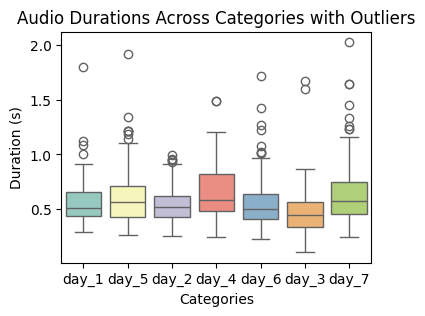

In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate duration from audio file
def calculate_duration(audio_path):
    audio, _ = librosa.load(audio_path)
    duration = librosa.get_duration(y=audio)
    return duration

# Directory containing audio files
audio_dir = '/content/drive/MyDrive/Trimmed_voices'

# List to store duration values for each category
all_durations = []
category_labels = []

# Iterate through audio files and calculate durations
for category in os.listdir(audio_dir):
    category_path = os.path.join(audio_dir, category)
    if os.path.isdir(category_path):
        durations = [calculate_duration(os.path.join(category_path, filename)) for filename in os.listdir(category_path) if filename.endswith('.ogg')]
        all_durations.extend(durations)
        category_labels.extend([category] * len(durations))

# Create a boxplot with outliers highlighted
plt.figure(figsize=(4, 3))
sns.boxplot(x=category_labels, y=all_durations, palette="Set3", showfliers=True)
plt.title('Audio Durations Across Categories with Outliers')
plt.xlabel('Categories')
plt.ylabel('Duration (s)')
plt.show()

<ipython-input-4-d890219ae009>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=category_labels, y=all_durations, palette="Set3", order=sorted(set(category_labels)), showfliers=True)


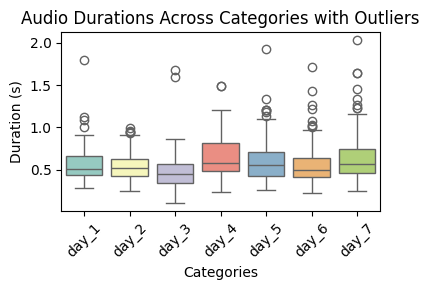

In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate duration from audio file
def calculate_duration(audio_path):
    audio, _ = librosa.load(audio_path)
    duration = librosa.get_duration(y=audio)
    return duration

# Directory containing audio files
audio_dir = '/content/drive/MyDrive/Trimmed_voices'

# List to store duration values for each category
all_durations = []
category_labels = []

# Iterate through audio files and calculate durations
for category in sorted(os.listdir(audio_dir)):
    category_path = os.path.join(audio_dir, category)
    if os.path.isdir(category_path):
        durations = [calculate_duration(os.path.join(category_path, filename)) for filename in os.listdir(category_path) if filename.endswith('.ogg')]
        all_durations.extend(durations)
        category_labels.extend([category] * len(durations))

# Create a boxplot with outliers highlighted
plt.figure(figsize=(4, 3))
sns.boxplot(x=category_labels, y=all_durations, palette="Set3", order=sorted(set(category_labels)), showfliers=True)
plt.title('Audio Durations Across Categories with Outliers')
plt.xlabel('Categories')
plt.ylabel('Duration (s)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

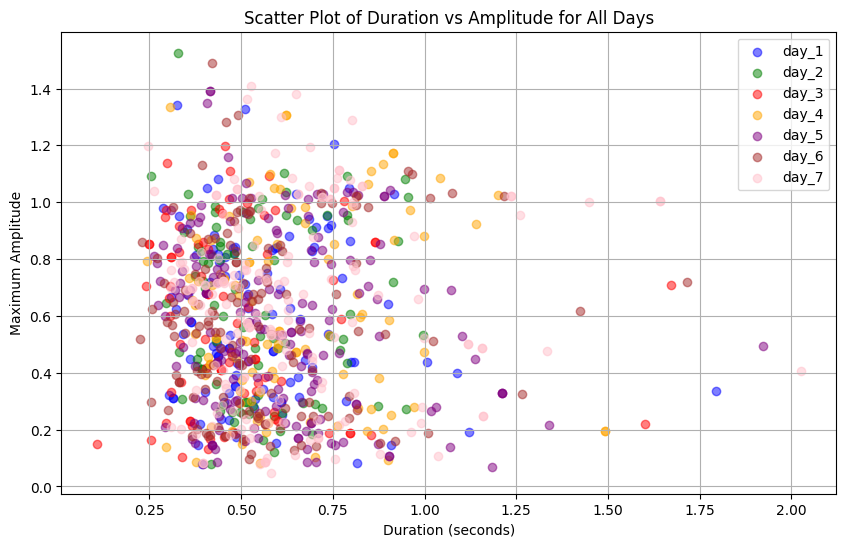

In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Define the main directory
main_dir = "/content/drive/MyDrive/Trimmed_voices"

# Selected categories
selected_categories = ['day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7']

# Initialize lists to accumulate data for all days
all_durations = []
all_max_amplitudes = []
day_labels = []

# Define colors for each day
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink']

# Function to calculate duration and amplitude of audio files
def calculate_duration_and_amplitude(audio_files):
    durations = []
    max_amplitudes = []

    for audio_file in audio_files:
        # Load the audio data
        audio_data, sr = librosa.load(audio_file)

        # Calculate duration
        duration = librosa.get_duration(y=audio_data, sr=sr)
        durations.append(duration)

        # Calculate maximum amplitude
        max_amplitude = np.max(np.abs(audio_data))
        max_amplitudes.append(max_amplitude)

    return durations, max_amplitudes

# Accumulate data for all days
for i, category in enumerate(selected_categories):
    category_path = os.path.join(main_dir, category)

    # Check if the category directory exists
    if not os.path.exists(category_path) or not os.path.isdir(category_path):
        print(f"Warning: {category} directory not found.")
        continue

    audio_files = [os.path.join(category_path, file) for file in os.listdir(category_path) if file.endswith('.ogg')]

    # Calculate duration and amplitude
    durations, max_amplitudes = calculate_duration_and_amplitude(audio_files)

    # Accumulate data
    all_durations.extend(durations)
    all_max_amplitudes.extend(max_amplitudes)
    day_labels.extend([category] * len(durations))

# Plot scatter diagram for all days with different colors
plt.figure(figsize=(10, 6))
for i, category in enumerate(selected_categories):
    # Filter data points for the current day
    day_indices = [j for j, label in enumerate(day_labels) if label == category]
    day_durations = [all_durations[idx] for idx in day_indices]
    day_amplitudes = [all_max_amplitudes[idx] for idx in day_indices]

    # Plot data points for the current day with a unique color
    plt.scatter(day_durations, day_amplitudes, c=colors[i], alpha=0.5, label=category)

plt.title("Scatter Plot of Duration vs Amplitude for All Days")
plt.xlabel("Duration (seconds)")
plt.ylabel("Maximum Amplitude")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
import os

# Define the main directory
main_dir = "/content/drive/MyDrive/Trimmed_voices"

# Selected categories
selected_categories = ['day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7']

# Iterate through selected categories
for category in selected_categories:
    category_path = os.path.join(main_dir, category)

    # Check if the category directory exists
    if not os.path.exists(category_path) or not os.path.isdir(category_path):
        print(f"Warning: {category} directory not found.")
        continue

    print(f"Category: {category}")

    audio_files = [file for file in os.listdir(category_path) if file.endswith('.ogg')]

    # Print the number of audio files in each category
    print(f"Number of audio files in {category} category: {len(audio_files)}")

    print()

Category: day_1
Number of audio files in day_1 category: 102

Category: day_2
Number of audio files in day_2 category: 89

Category: day_3
Number of audio files in day_3 category: 76

Category: day_4
Number of audio files in day_4 category: 103

Category: day_5
Number of audio files in day_5 category: 181

Category: day_6
Number of audio files in day_6 category: 141

Category: day_7
Number of audio files in day_7 category: 179



In [ ]:
pip install noisereduce

In [ ]:
import os
from scipy.io import wavfile
import matplotlib.pyplot as plt
import noisereduce as nr

# Specify paths
input_folder = '/content/drive/MyDrive/Trimmed_voices'
output_folder = '/content/drive/MyDrive/denoised_voices'

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Process each audio file in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith('.ogg'):
        # Load the audio file
        input_filepath = os.path.join(input_folder, filename)
        sample_rate, original_signal = wavfile.read(input_filepath)

        # Apply spectral subtraction for denoising
        reduced_noise = nr.reduce_noise(audio_clip=original_signal, noise_clip=original_signal[:int(sample_rate * 0.1)])

        # Save the denoised signal to the output folder
        output_filepath = os.path.join(output_folder, f'denoised_{filename}')
        wavfile.write(output_filepath, sample_rate, reduced_noise)

        # Optionally, plot and compare the original and denoised signals
        plt.figure(figsize=(12, 6))
        plt.plot(original_signal, label='Original Signal')
        plt.plot(reduced_noise, label='Denoised Signal')
        plt.title(f'Spectral Subtraction Denoising of {filename}')
        plt.xlabel('Sample Index')
        plt.ylabel('Amplitude')
        plt.legend()
        plt.show()

        print(f'Denoised audio saved to: {output_filepath}')

# Preprocessing

In [ ]:
pip install tqdm

In [ ]:
pip install librosa soundfile

### Amplitude NOrmalisation

In [ ]:
import os
import soundfile as sf
import numpy as np
from tqdm import tqdm

# Define paths
Trimmed_dir = "/content/drive/MyDrive/Cleaned_voices"
normalized_dir = "/content/drive/MyDrive/normalized"

try:
    # Create the new directory for normalized files
    os.makedirs(normalized_dir, exist_ok=True)

    # Iterate through the trimmed audio files
    for category in os.listdir(Trimmed_dir):
        category_dir = os.path.join(Trimmed_dir, category)
        normalized_category_dir = os.path.join(normalized_dir, category)

        # Create the directory for the normalized category
        os.makedirs(normalized_category_dir, exist_ok=True)

        for Trimmed_file in tqdm(os.listdir(category_dir)):
            if Trimmed_file.endswith('.ogg'):
                Trimmed_audio_path = os.path.join(category_dir, Trimmed_file)
                normalized_audio_path = os.path.join(normalized_category_dir, Trimmed_file.replace('_stretch', '_normalized'))

                try:
                    # Load the Trimmed audio file
                    Trimmed_audio, sr_Trimmed = sf.read(Trimmed_audio_path)

                    # Normalize audio amplitudes
                    normalized_audio = Trimmed_audio / np.max(np.abs(Trimmed_audio))

                    # Save the normalized audio to the new directory
                    sf.write(normalized_audio_path, normalized_audio, sr_Trimmed)

                except Exception as e:
                    print(f"Error processing {Trimmed_audio_path}: {e}")

    print("Amplitude normalization completed, and normalized files saved!")

except Exception as e:
    print(f"An error occurred: {e}")


100%|██████████| 165/165 [00:05<00:00, 28.44it/s]

Amplitude normalization completed, and normalized files saved!


In [ ]:
max_amplitude_original = np.max(np.abs(Trimmed_audio))
min_amplitude_original = np.min(np.abs(Trimmed_audio))

max_amplitude_normalized = np.max(np.abs(normalized_audio))
min_amplitude_normalized = np.min(np.abs(normalized_audio))

print(f"Original Amplitude Range: {min_amplitude_original} to {max_amplitude_original}")
print(f"Normalized Amplitude Range: {min_amplitude_normalized} to {max_amplitude_normalized}")

Original Amplitude Range: 2.6347115635871887e-05 to 1.438676118850708
Normalized Amplitude Range: 1.8313444764009417e-05 to 1.0


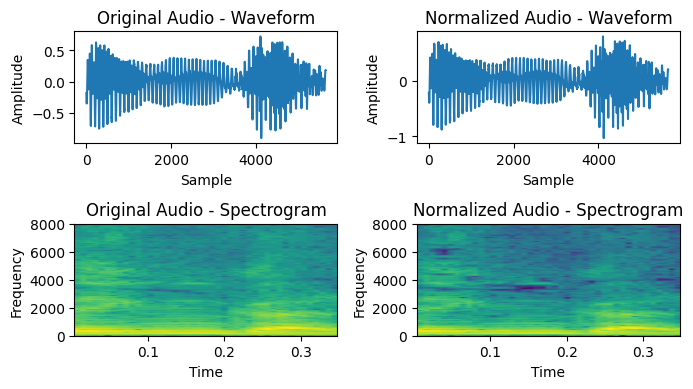

Original Audio:


Normalized Audio:


In [ ]:
import os
import soundfile as sf
import numpy as np
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt

original_audio_path = '/content/drive/MyDrive/Trimmed_voices/day_1/WhatsApp Ptt 2023-08-31 at 12.53.00 AM_trimmed.ogg'
normalized_audio_path = '/content/drive/MyDrive/normalized/day_1/WhatsApp Ptt 2023-08-31 at 12.53.00 AM_trimmed.ogg'

original_audio, sr_original = sf.read(original_audio_path)
normalized_audio, sr_normalized = sf.read(normalized_audio_path)

# Plot waveforms
plt.figure(figsize=(7, 4))

plt.subplot(2, 2, 1)
plt.title("Original Audio - Waveform")
plt.plot(original_audio)
plt.xlabel("Sample")
plt.ylabel("Amplitude")

plt.subplot(2, 2, 2)
plt.title("Normalized Audio - Waveform")
plt.plot(normalized_audio)
plt.xlabel("Sample")
plt.ylabel("Amplitude")

# Plot spectrograms
plt.subplot(2, 2, 3)
plt.specgram(original_audio, Fs=sr_original)
plt.title("Original Audio - Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency")

plt.subplot(2, 2, 4)
plt.specgram(normalized_audio, Fs=sr_normalized)
plt.title("Normalized Audio - Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Play the original audio
print("Original Audio:")
ipd.display(ipd.Audio(original_audio, rate=sr_original))

# Play the normalized audio
print("Normalized Audio:")
ipd.display(ipd.Audio(normalized_audio, rate=sr_normalized))


### Spectral reduction on Normalised data

In [ ]:
import os
import soundfile as sf
import numpy as np
from tqdm import tqdm
from scipy.fft import fft, ifft

# Define paths
normalized_dir = "/content/drive/MyDrive/normalized"
spectral_reduced_dir = "/content/drive/MyDrive/spectral_reduced"

try:
    # Create the new directory for spectral reduced files
    os.makedirs(spectral_reduced_dir, exist_ok=True)

    # Parameters for spectral reduction
    reduction_factor = 0.5  # Adjust this value based on your needs

    # Iterate through the normalized audio files
    for category in os.listdir(normalized_dir):
        category_dir = os.path.join(normalized_dir, category)
        spectral_reduced_category_dir = os.path.join(spectral_reduced_dir, category)

        # Create the directory for the spectral reduced category
        os.makedirs(spectral_reduced_category_dir, exist_ok=True)

        for normalized_file in tqdm(os.listdir(category_dir)):
            if normalized_file.endswith('.ogg'):
                normalized_audio_path = os.path.join(category_dir, normalized_file)
                spectral_reduced_audio_path = os.path.join(spectral_reduced_category_dir, normalized_file.replace('_normalized', '_spectral_reduced'))

                try:
                    # Load the normalized audio file
                    normalized_audio, sr_normalized = sf.read(normalized_audio_path)

                    # Apply FFT
                    spectrum = fft(normalized_audio)

                    # Reduce the spectrum (for example, by zeroing out higher frequency components)
                    reduced_spectrum = spectrum[:int(len(spectrum) * reduction_factor)]

                    # Apply Inverse FFT
                    spectral_reduced_audio = ifft(reduced_spectrum).real

                    # Save the spectral reduced audio to the new directory
                    sf.write(spectral_reduced_audio_path, spectral_reduced_audio, sr_normalized)

                except Exception as e:
                    print(f"Error processing {normalized_audio_path}: {e}")

    print("Spectral reduction completed, and spectral reduced files saved!")

except Exception as e:
    print(f"An error occurred: {e}")

100%|██████████| 165/165 [00:04<00:00, 39.43it/s]

Spectral reduction completed, and spectral reduced files saved!


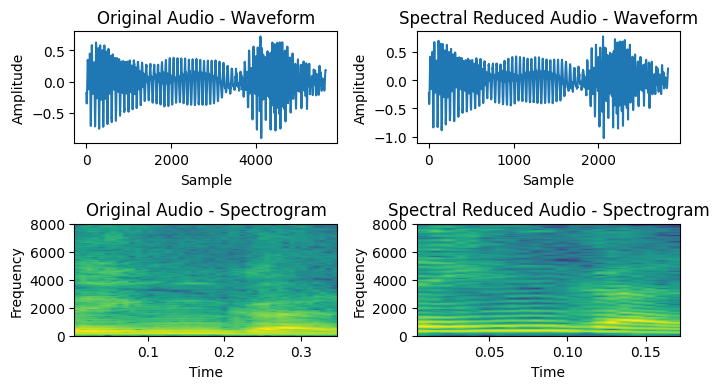

Original Audio:


Spectral Reduced Audio:


In [ ]:
import os
import soundfile as sf
import numpy as np
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt

def visualize_and_play_spectral_reduced(original_audio_path, spectral_reduced_audio_path):
    # Load audio files
    original_audio, sr_original = sf.read(original_audio_path)
    spectral_reduced_audio, sr_spectral_reduced = sf.read(spectral_reduced_audio_path)

    # Plot waveforms
    plt.figure(figsize=(7, 4))

    plt.subplot(2, 2, 1)
    plt.title("Original Audio - Waveform")
    plt.plot(original_audio)
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")

    plt.subplot(2, 2, 2)
    plt.title("Spectral Reduced Audio - Waveform")
    plt.plot(spectral_reduced_audio)
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")

    # Plot spectrograms
    plt.subplot(2, 2, 3)
    plt.specgram(original_audio, Fs=sr_original)
    plt.title("Original Audio - Spectrogram")
    plt.xlabel("Time")
    plt.ylabel("Frequency")

    plt.subplot(2, 2, 4)
    plt.specgram(spectral_reduced_audio, Fs=sr_spectral_reduced)
    plt.title("Spectral Reduced Audio - Spectrogram")
    plt.xlabel("Time")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

    # Play the original audio
    print("Original Audio:")
    ipd.display(ipd.Audio(original_audio, rate=sr_original))

    # Play the spectral-reduced audio
    print("Spectral Reduced Audio:")
    ipd.display(ipd.Audio(spectral_reduced_audio, rate=sr_spectral_reduced))

# Example usage
original_audio_path ='/content/drive/MyDrive/Trimmed_voices/day_1/WhatsApp Ptt 2023-08-31 at 12.53.00 AM_trimmed.ogg'  # Replace with the path to your original audio file
spectral_reduced_audio_path = '/content/drive/MyDrive/spectral_reduced/day_1/WhatsApp Ptt 2023-08-31 at 12.53.00 AM_trimmed.ogg'  # Replace with the path to your spectral-reduced audio file

visualize_and_play_spectral_reduced(original_audio_path, spectral_reduced_audio_path)

In [ ]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import soundfile as sf
import IPython.display as ipd

# Function to visualize audio
def visualize_audio(original_audio, augmented_audio, normalized_audio, spectral_reduced_audio, sr):
    # Plot waveforms
    plt.figure(figsize=(15, 8))

    plt.subplot(3, 2, 1)
    plt.title("Original Audio - Waveform")
    librosa.display.waveshow(original_audio, sr=sr)
    plt.xlabel("Time")
    plt.ylabel("Amplitude")

    plt.subplot(3, 2, 2)
    plt.title("Augmented Audio - Waveform")
    librosa.display.waveshow(augmented_audio, sr=sr)
    plt.xlabel("Time")
    plt.ylabel("Amplitude")

    plt.subplot(3, 2, 3)
    plt.title("Normalized Audio - Waveform")
    librosa.display.waveshow(normalized_audio, sr=sr)
    plt.xlabel("Time")
    plt.ylabel("Amplitude")

    plt.subplot(3, 2, 4)
    plt.title("Spectrally Reduced Audio - Waveform")
    librosa.display.waveshow(spectral_reduced_audio, sr=sr)
    plt.xlabel("Time")
    plt.ylabel("Amplitude")

    # Plot spectrograms
    plt.subplot(3, 2, 5)
    D_original = librosa.amplitude_to_db(librosa.stft(original_audio), ref=np.max)
    librosa.display.specshow(D_original, sr=sr, x_axis='time', y_axis='log')
    plt.title("Original Audio - Spectrogram")
    plt.xlabel("Time")
    plt.ylabel("Frequency")

    plt.subplot(3, 2, 6)
    D_spectral_reduced = librosa.amplitude_to_db(librosa.stft(spectral_reduced_audio), ref=np.max)
    librosa.display.specshow(D_spectral_reduced, sr=sr, x_axis='time', y_axis='log')
    plt.title("Spectrally Reduced Audio - Spectrogram")
    plt.xlabel("Time")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

# Define paths
category = "day_4"
original_audio_path = '/content/drive/MyDrive/voices/day_4/WhatsApp Ptt 2023-08-31 at 12.53.00 AM.ogg'
augmented_audio_path = '/content/drive/MyDrive/Augmented_voices/day_4/WhatsApp Audio 2023-07-06 at 7.51.52 PM_trimmed.ogg'
normalized_audio_path = '/content/drive/MyDrive/normalized_augmented_audio/day_4/WhatsApp Audio 2023-07-06 at 7.51.52 PM_trimmed.ogg'
spectral_reduced_audio_path = '/content/drive/MyDrive/spectral_reduced_audio/day_4/WhatsApp Audio 2023-07-06 at 7.51.52 PM_trimmed.ogg'

# Load the audio files
original_audio, sr_original = sf.read(original_audio_path)
augmented_audio, sr_augmented = sf.read(augmented_audio_path)
normalized_audio, sr_normalized = sf.read(normalized_audio_path)
spectral_reduced_audio, sr_spectral_reduced = sf.read(spectral_reduced_audio_path)

# Visualize the audio
visualize_audio(original_audio, augmented_audio, normalized_audio, spectral_reduced_audio, sr_original)

# Play the original audio
print("Original Audio:")
ipd.display(ipd.Audio(original_audio, rate=sr_original))

# Play the augmented audio
print("Augmented Audio:")
ipd.display(ipd.Audio(augmented_audio, rate=sr_augmented))

# Play the normalized audio
print("Normalized Audio:")
ipd.display(ipd.Audio(normalized_audio, rate=sr_normalized))

# Play the spectrally reduced audio
print("Spectrally Reduced Audio:")
ipd.display(ipd.Audio(spectral_reduced_audio, rate=sr_spectral_reduced))


LibsndfileError: Error opening '/content/drive/MyDrive/voices/day_4/WhatsApp Ptt 2023-08-31 at 12.53.00 AM.ogg': System error.

## model building

In [ ]:
pip install pydub

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import soundfile as sf
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import StratifiedKFold

# Function to load data
def load_data(data_dir, max_length):
    data = []
    labels = []
    class_names = sorted(os.listdir(data_dir))

    for class_idx, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        for audio_file in os.listdir(class_dir):
            if audio_file.endswith('.ogg'):
                audio_path = os.path.join(class_dir, audio_file)
                try:
                    # Load the audio file using soundfile
                    audio, _ = sf.read(audio_path, dtype='float32')

                    # Pad or truncate the audio to the specified max_length
                    if len(audio) < max_length:
                        padding = np.zeros(max_length - len(audio))
                        audio = np.concatenate((audio, padding))
                    else:
                        audio = audio[:max_length]

                    data.append(audio)
                    labels.append(class_idx)

                except Exception as e:
                    print(f"Error loading {audio_path}: {e}")

    return np.array(data), np.array(labels)

# Path to the data
data_dir = '/content/drive/MyDrive/spectral_reduced'

# Parameters
sampling_rate = 44100
time_in_seconds = 0.3
max_length = int(time_in_seconds * sampling_rate)
num_classes = 7
batch_size = 32
epochs = 15

# Load data
data, labels = load_data(data_dir, max_length)

# Convert labels to categorical
labels_categorical = tf.keras.utils.to_categorical(labels, num_classes)

# Create a K-fold cross-validation iterator
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over folds
for fold_idx, (train_indices, val_indices) in enumerate(kfold.split(data, labels)):
    print(f'\nFold {fold_idx + 1}...')

    # Split data into training and validation sets
    train_data, val_data = data[train_indices], data[val_indices]
    train_labels, val_labels = labels_categorical[train_indices], labels_categorical[val_indices]

    # Build the model
    model = Sequential()
    model.add(Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(max_length, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    history = model.fit(train_data.reshape(-1, max_length, 1), train_labels, epochs=epochs, batch_size=batch_size, validation_data=(val_data.reshape(-1, max_length, 1), val_labels))

    # Evaluate the model on the validation set
    val_loss, val_accuracy = model.evaluate(val_data.reshape(-1, max_length, 1), val_labels)
    print(f'Validation Loss: {val_loss:.4f}')
    print(f'Validation Accuracy: {val_accuracy:.4f}')

KeyboardInterrupt: 

In [ ]:
input_shape=(max_length, 1)
print(input_shape)

(13230, 1)


In [ ]:
import os
import numpy as np
import soundfile as sf
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import StratifiedKFold

# Function to load data
def load_data(data_dir, max_length):
    data = []
    labels = []
    class_names = sorted(os.listdir(data_dir))

    for class_idx, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        for audio_file in os.listdir(class_dir):
            if audio_file.endswith('.ogg'):
                audio_path = os.path.join(class_dir, audio_file)
                try:
                    # Load the audio file using soundfile
                    audio, _ = sf.read(audio_path, dtype='float32')

                    # Pad or truncate the audio to the specified max_length
                    if len(audio) < max_length:
                        padding = np.zeros(max_length - len(audio))
                        audio = np.concatenate((audio, padding))
                    else:
                        audio = audio[:max_length]

                    data.append(audio)
                    labels.append(class_idx)

                except Exception as e:
                    print(f"Error loading {audio_path}: {e}")

    return np.array(data), np.array(labels)

# Path to the data
data_dir = '/content/drive/MyDrive/spectral_reduced'

# Parameters
sampling_rate = 44100
time_in_seconds = 0.3
max_length = int(time_in_seconds * sampling_rate)
num_classes = 7
batch_size = 32
epochs = 15

# Load data
data, labels = load_data(data_dir, max_length)

# Convert labels to categorical
labels_categorical = tf.keras.utils.to_categorical(labels, num_classes)

# Create a K-fold cross-validation iterator
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over folds
for fold_idx, (train_indices, val_indices) in enumerate(kfold.split(data, labels)):
    print(f'\nFold {fold_idx + 1}...')

    # Split data into training and validation sets
    train_data, val_data = data[train_indices], data[val_indices]
    train_labels, val_labels = labels_categorical[train_indices], labels_categorical[val_indices]

    # Build the model
    model = Sequential()
    model.add(Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(max_length, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    history = model.fit(train_data.reshape(-1, max_length, 1), train_labels, epochs=epochs, batch_size=batch_size, validation_data=(val_data.reshape(-1, max_length, 1), val_labels))

    # Evaluate the model on the validation set
    val_loss, val_accuracy = model.evaluate(val_data.reshape(-1, max_length, 1), val_labels)
    print(f'Validation Loss: {val_loss:.4f}')
    print(f'Validation Accuracy: {val_accuracy:.4f}')


Fold 1...
Epoch 1/15
24/24 [==============================] - 19s 747ms/step - loss: 1.9202 - accuracy: 0.2098 - val_loss: 1.8280 - val_accuracy: 0.2738
Epoch 2/15
24/24 [==============================] - 17s 723ms/step - loss: 1.7232 - accuracy: 0.2882 - val_loss: 1.6207 - val_accuracy: 0.4405
Epoch 3/15
24/24 [==============================] - 17s 709ms/step - loss: 1.4571 - accuracy: 0.4382 - val_loss: 1.5151 - val_accuracy: 0.4643
Epoch 4/15
24/24 [==============================] - 17s 714ms/step - loss: 1.1975 - accuracy: 0.5777 - val_loss: 1.4608 - val_accuracy: 0.5119
Epoch 5/15
24/24 [==============================] - 18s 720ms/step - loss: 0.9299 - accuracy: 0.6720 - val_loss: 1.4764 - val_accuracy: 0.5476
Epoch 6/15
24/24 [==============================] - 17s 713ms/step - loss: 0.8143 - accuracy: 0.7171 - val_loss: 1.3969 - val_accuracy: 0.5476
Epoch 7/15
24/24 [==============================] - 17s 715ms/step - loss: 0.5396 - accuracy: 0.8234 - val_loss: 1.3098 - val_accur

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-d335c99ca299>", line 85, in <cell line: 60>
    history = model.fit(train_data.reshape(-1, max_length, 1), train_labels, epochs=epochs, batch_size=batch_size, validation_data=(val_data.reshape(-1, max_length, 1), val_labels))
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit
    tmp_logs = self.train_function(iterator)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/polymorphic_function.py", l

TypeError: object of type 'NoneType' has no len()

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_18 (Conv1D)          (None, 88198, 32)         128       
                                                                 
 max_pooling1d_18 (MaxPooli  (None, 44099, 32)         0         
 ng1D)                                                           
                                                                 
 conv1d_19 (Conv1D)          (None, 44097, 64)         6208      
                                                                 
 max_pooling1d_19 (MaxPooli  (None, 22048, 64)         0         
 ng1D)                                                           
                                                                 
 conv1d_20 (Conv1D)          (None, 22046, 128)        24704     
                                                                 
 max_pooling1d_20 (MaxPooli  (None, 11023, 128)       

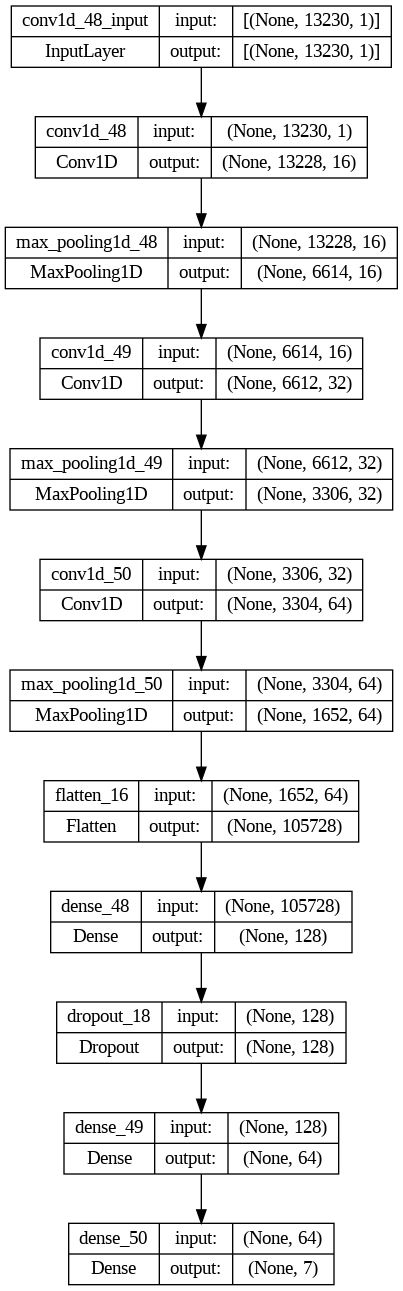

In [ ]:
# Save the model architecture to a file
from tensorflow.keras.utils import plot_model
model_architecture_path = '/content/drive/MyDrive/model_architecture.png'
plot_model(model, to_file=model_architecture_path, show_shapes=True, show_layer_names=True)

# Display the saved image
from IPython.display import Image
Image(filename=model_architecture_path)

In [ ]:
import os

# Define the main directory
main_dir = '/content/drive/MyDrive/spectral_reduced_audio'

# Selected categories
selected_categories = ['day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7']

# Iterate through selected categories
for category in selected_categories:
    category_path = os.path.join(main_dir, category)

    # Check if the category directory exists
    if not os.path.exists(category_path) or not os.path.isdir(category_path):
        print(f"Warning: {category} directory not found.")
        continue

    print(f"Category: {category}")

    audio_files = [file for file in os.listdir(category_path) if file.endswith('.ogg')]

    # Print the number of audio files in each category
    print(f"Number of audio files in {category} category: {len(audio_files)}")

    print()

Category: day_1
Number of audio files in day_1 category: 103

Category: day_2
Number of audio files in day_2 category: 89

Category: day_3
Number of audio files in day_3 category: 76

Category: day_4
Number of audio files in day_4 category: 103

Category: day_5
Number of audio files in day_5 category: 190

Category: day_6
Number of audio files in day_6 category: 141

Category: day_7
Number of audio files in day_7 category: 179



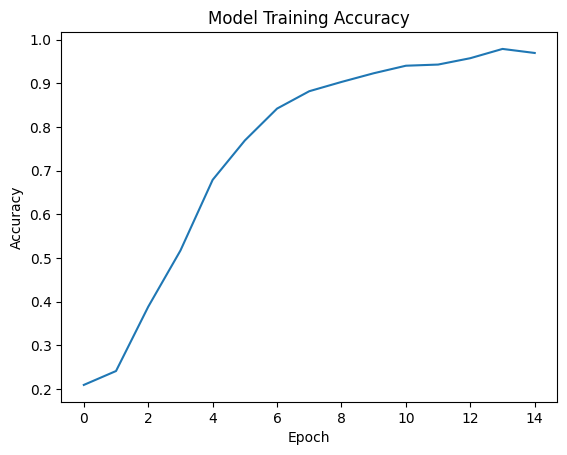

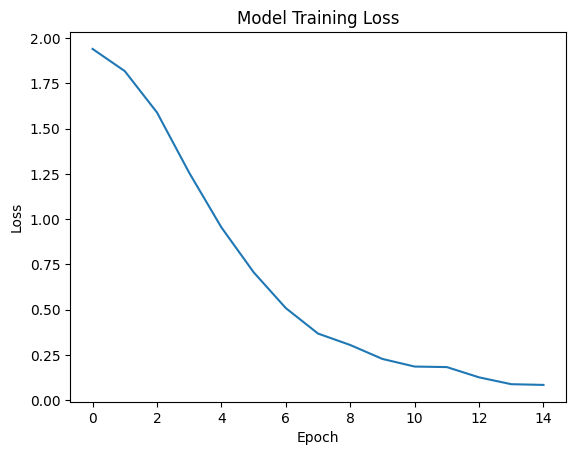

In [ ]:
import matplotlib.pyplot as plt

# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Plot training loss
plt.plot(history.history['loss'])
plt.title('Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
# Make predictions on the validation set
val_predictions = np.argmax(model.predict(val_data.reshape(-1, max_length, 1)), axis=1)

    # Convert validation labels back to categorical (if needed)
val_labels_categorical = np.argmax(val_labels, axis=1)

    # Compute confusion matrix and classification report
cm = confusion_matrix(val_labels_categorical, val_predictions)
print(f'Confusion Matrix:\n{cm}')

classification_rep = classification_report(val_labels_categorical, val_predictions)
print(f'Classification Report:\n{classification_rep}')



3/3 [==============================] - 0s 8ms/step
Confusion Matrix:
[[ 5  0  0  1  1  1  2]
 [ 1  7  0  0  0  0  0]
 [ 2  0  4  0  0  0  2]
 [ 0  0  0  4  0  0  6]
 [ 1  0  0  1 10  3  2]
 [ 0  0  0  0  4  8  2]
 [ 0  0  0  0  0  0 16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.50      0.53        10
           1       1.00      0.88      0.93         8
           2       1.00      0.50      0.67         8
           3       0.67      0.40      0.50        10
           4       0.67      0.59      0.62        17
           5       0.67      0.57      0.62        14
           6       0.53      1.00      0.70        16

    accuracy                           0.65        83
   macro avg       0.73      0.63      0.65        83
weighted avg       0.69      0.65      0.64        83



In [ ]:
# Load and preprocess the unseen audio file
new_audio, _ = librosa.load('/content/drive/MyDrive/Trimmed_voices/day_4/WhatsApp Audio 2023-07-06 at 7.48.34 PM (1)_trimmed.ogg', sr=None)
if len(new_audio) < max_length:
    padding = np.zeros(max_length - len(new_audio))
    new_audio = np.concatenate((new_audio, padding))
else:
    new_audio = new_audio[:max_length]

# Reshape and normalize the data
new_audio = new_audio.reshape(1, max_length, 1)

# Make predictions
predictions = model.predict(new_audio)
predicted_day = np.argmax(predictions)

# Convert the predicted class index to the corresponding day
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
predicted_day_name = days_of_week[predicted_day]

print(f'Predicted day: {predicted_day_name}')


1/1 [==============================] - 0s 17ms/step
Predicted day: Sunday


spectral_reduced_audio/train/day_5/WhatsApp Audio 2023-07-07 at 3.41.14 PM_stretch_0.80.ogg
spectral_reduced_audio/train/day_7/WhatsApp Audio 2023-07-12 at 4.21.20 PM_stretch_0.80.ogg
spectral_reduced_audio/train/day_7/WhatsApp Audio 2023-07-12 at 4.22.03 PM_stretch_0.80.ogg
audio_dataset/train/day_5/WhatsApp Audio 2023-07-07 at 3.42.02 PM.ogg
spectral_reduced_audio/train/day_3/WhatsApp Audio 2023-07-06 at 7.45.04 PM (1)_stretch_1.20.ogg
spectral_reduced_audio/train/day_7/WhatsApp Audio 2023-07-12 at 4.21.20 PM_stretch_0.80.ogg
spectral_reduced_audio/test/day_1/WhatsApp Audio 2023-08-30 at 9.17.02 PM (4)_stretch_1.20.ogg
spectral_reduced_audio/test/day_6/WhatsApp Audio 2023-09-01 at 11.10.24 PM_stretch_0.80.ogg

In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Function to create and save spectrogram
def save_spectrogram(audio_path, save_path, category, sr=22050, n_fft=2048, hop_length=512):
    # Load audio file
    audio, _ = librosa.load(audio_path, sr=sr)

    # Create spectrogram
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=n_fft, hop_length=hop_length)

    # Convert to decibels
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

    # Plot and save spectrogram
    plt.figure(figsize=(10, 6))
    plt.imshow(spectrogram_db, cmap='viridis', origin='lower', aspect='auto')
    plt.colorbar(format='%+2.0f dB')
    plt.xlabel('Time')
    plt.ylabel('Mel Frequency')
    plt.title('Spectrogram')

    # Extract filename without extension
    file_name = os.path.splitext(os.path.basename(audio_path))[0]

    # Save the spectrogram image in a subfolder corresponding to the original category
    category_folder = os.path.join(save_path, category)
    os.makedirs(category_folder, exist_ok=True)

    save_file_path = os.path.join(category_folder, f'{file_name}_spectrogram.png')
    plt.savefig(save_file_path, bbox_inches='tight')
    plt.close()

# Paths
input_folder = '/content/drive/MyDrive/spectral_reduced_audio'  # Replace with your audio folder
output_folder = '/content/drive/MyDrive/spectrograms'  # Replace with the desired output folder

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Process each audio file in the input folder and save in corresponding subfolder
for category in os.listdir(input_folder):
    category_path = os.path.join(input_folder, category)
    if os.path.isdir(category_path):
        for filename in os.listdir(category_path):
            if filename.endswith('.ogg'):
                audio_path = os.path.join(category_path, filename)
                save_spectrogram(audio_path, output_folder, category)

print("Spectrograms created and saved successfully.")


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1164
  warnings.warn(


KeyboardInterrupt: 

<Figure size 1000x600 with 0 Axes>

In [ ]:
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Function to load data from the spectral reduced dataset
def load_data(data_dir, max_length):
    data = []
    labels = []

    for category in os.listdir(data_dir):
        category_dir = os.path.join(data_dir, category)

        for audio_file in os.listdir(category_dir):
            if audio_file.endswith('.npy'):
                audio_path = os.path.join(category_dir, audio_file)
                audio_data = np.load(audio_path)

                # Ensure all audio clips have the same length
                if len(audio_data) < max_length:
                    # Pad shorter clips with zeros at the end
                    audio_data = np.pad(audio_data, (0, max_length - len(audio_data)), 'constant')
                elif len(audio_data) > max_length:
                    # Truncate longer clips
                    audio_data = audio_data[:max_length]

                data.append(audio_data)
                labels.append(int(category.split('_')[1]) - 1)  # Assuming your categories are named 'day_1', 'day_2', etc.

    return np.array(data), np.array(labels)

# Load data from the specified directory
data_dir = '/content/drive/MyDrive/spectral_reduced'
max_length = 44100  # Adjust this based on your desired audio length
num_classes = 7

# Load data and perform one-hot encoding of labels
X, y = load_data(data_dir, max_length)
y_one_hot = tf.keras.utils.to_categorical(y, num_classes)

# Define the number of folds
num_folds = 5  # You can adjust this number
num_epochs = 20  # Specify the number of epochs

# Initialize StratifiedKFold
stratkf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lists to store evaluation metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
auc_list = []

# Iterate over folds
for fold, (train_indices, test_indices) in enumerate(stratkf.split(X, np.argmax(y_one_hot, axis=1))):
    print(f"Training Fold {fold + 1}...")

    # Extract fold-specific training and testing data
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y_one_hot[train_indices], y_one_hot[test_indices]

    # Build the model
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(max_length, 1)))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())

    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    model.fit(X_train.reshape(-1, max_length, 1), y_train, epochs=num_epochs, batch_size=32, verbose=0)

    # Evaluate the model on the test set
    predictions = model.predict(X_test.reshape(-1, max_length, 1))

    # Convert probabilities to class labels
    pred_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(y_test, axis=1)

    # Calculate metrics for the fold
    accuracy = accuracy_score(true_labels, pred_labels)
    precision = precision_score(true_labels, pred_labels, average='weighted')
    recall = recall_score(true_labels, pred_labels, average='weighted')

    # Assuming multi-class classification for AUC calculation
    # Adjust this part if you have binary classification
    auc = roc_auc_score(y_test, predictions, multi_class='ovr', average='weighted')

    # Append metrics to lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    auc_list.append(auc)

    print(f"Fold {fold + 1} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, AUC: {auc}")

# Print average metrics across all folds
print(f"\nAverage Metrics Across {num_folds} Folds:")
print(f"Average Accuracy: {np.mean(accuracy_list)}")
print(f"Average Precision: {np.mean(precision_list)}")
print(f"Average Recall: {np.mean(recall_list)}")
print(f"Average AUC: {np.mean(auc_list)}")

ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Placeholder for the data loading function (replace with your actual implementation)
def load_data(data_dir, max_length):
    # Your data loading logic here (e.g., loading audio files and their corresponding labels)
    # Make sure to return X (data) and y (labels)
    # Ensure that X has the shape (num_samples, max_length) and y is one-hot encoded

    # Example placeholder (replace this with your actual implementation)
    X = np.random.random((100, max_length))  # Placeholder data
    y = np.random.randint(0, 7, 100)  # Placeholder labels

    return X, y

# Load data from the specified directory
data_dir = '/content/drive/MyDrive/spectral_reduced_audio'
max_length = 44100  # Adjust this based on your desired audio length
num_classes = 7

# Load data and perform one-hot encoding of labels
X, y = load_data(data_dir, max_length)
y_one_hot = tf.keras.utils.to_categorical(y, num_classes)

# Print the shape of loaded data
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y_one_hot.shape}")

# Define the number of folds
num_folds = 5  # You can adjust this number
num_epochs = 20  # Specify the number of epochs

# Initialize StratifiedKFold
stratkf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lists to store evaluation metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
auc_list = []

# Iterate over folds
for fold, (train_indices, test_indices) in enumerate(stratkf.split(X, np.argmax(y_one_hot, axis=1))):
    print(f"Training Fold {fold + 1}...")

    # Extract fold-specific training and testing data
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y_one_hot[train_indices], y_one_hot[test_indices]

    # Build the model
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(max_length, 1)))
    model.add(MaxPooling1D(pool_size=2))

    # Add more layers as needed

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    model.fit(X_train.reshape(-1, max_length, 1), y_train, epochs=num_epochs, batch_size=32, verbose=0)

    # Evaluate the model on the test set
    predictions = model.predict(X_test.reshape(-1, max_length, 1))

    # Convert probabilities to class labels
    pred_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(y_test, axis=1)

    # Calculate metrics for the fold
    accuracy = accuracy_score(true_labels, pred_labels)
    precision = precision_score(true_labels, pred_labels, average='weighted')
    recall = recall_score(true_labels, pred_labels, average='weighted')

    # Assuming multi-class classification for AUC calculation
    auc = roc_auc_score(y_test, predictions, multi_class='ovr', average='weighted')

    # Append metrics to lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    auc_list.append(auc)

    print(f"Fold {fold + 1} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, AUC: {auc}")

# Print average metrics across all folds
print(f"\nAverage Metrics Across {num_folds} Folds:")
print(f"Average Accuracy: {np.mean(accuracy_list)}")
print(f"Average Precision: {np.mean(precision_list)}")
print(f"Average Recall: {np.mean(recall_list)}")
print(f"Average AUC: {np.mean(auc_list)}")

Shape of X: (100, 44100)
Shape of y: (100, 7)
Training Fold 1...


ResourceExhaustedError: {{function_node __wrapped__StatelessRandomUniformV2_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[705568,128] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:StatelessRandomUniformV2] name: 

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

Physical devices cannot be modified after being initialized


In [ ]:
import os
import numpy as np
import soundfile as sf
from scipy import interpolate
from tqdm import tqdm
import matplotlib.pyplot as plt

# Function to perform time stretching
def time_stretch(input_audio, stretch_factor):
    input_length = len(input_audio)
    output_length = int(input_length * stretch_factor)

    # Create a time axis for the original audio
    time_axis = np.arange(input_length)

    # Create a time axis for the stretched audio
    stretched_time_axis = np.linspace(0, input_length - 1, output_length)

    # Create an interpolation function
    interpolator = interpolate.interp1d(time_axis, input_audio, kind='linear', fill_value='extrapolate')

    # Perform interpolation to stretch/compress time
    stretched_audio = interpolator(stretched_time_axis)

    return stretched_audio

# Define paths
data_dir = "/content/drive/MyDrive/spectral_reduced"
output_dir = "/content/drive/MyDrive/Augspectral_reduced"

# Stretch factors to apply (0.8 for compression, 1.2 for stretching)
stretch_factors = [0.8, 1.2]

# Loop through the main directory
for category in os.listdir(data_dir):
    category_dir = os.path.join(data_dir, category)
    output_category_dir = os.path.join(output_dir, category)

    # Create output directory if it doesn't exist
    os.makedirs(output_category_dir, exist_ok=True)

    # Loop through audio files
    for audio_file in tqdm(os.listdir(category_dir)):
        if audio_file.endswith('.ogg'):
            audio_path = os.path.join(category_dir, audio_file)
            output_audio_path_base = os.path.join(output_category_dir, os.path.splitext(audio_file)[0])

            # Load the audio file
            audio_data, sr = sf.read(audio_path)

            # Apply time stretching for each factor
            for stretch_factor in stretch_factors:
                stretched_audio = time_stretch(audio_data, stretch_factor)
                output_audio_path = f'{output_audio_path_base}_stretch_{stretch_factor:.2f}.ogg'
                sf.write(output_audio_path, stretched_audio, sr)

print("Augmentation complete!")

100%|██████████| 165/165 [00:08<00:00, 20.06it/s]

Augmentation complete!


In [ ]:
import os

# Define the main directory
main_dir = "/content/drive/MyDrive/Augspectral_reduced"

# Selected categories
selected_categories = ['day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7']

# Iterate through selected categories
for category in selected_categories:
    category_path = os.path.join(main_dir, category)

    # Check if the category directory exists
    if not os.path.exists(category_path) or not os.path.isdir(category_path):
        print(f"Warning: {category} directory not found.")
        continue

    print(f"Category: {category}")

    audio_files = [file for file in os.listdir(category_path) if file.endswith('.ogg')]

    # Print the number of audio files in each category
    print(f"Number of audio files in {category} category: {len(audio_files)}")

    print()

Category: day_1
Number of audio files in day_1 category: 200

Category: day_2
Number of audio files in day_2 category: 178

Category: day_3
Number of audio files in day_3 category: 148

Category: day_4
Number of audio files in day_4 category: 198

Category: day_5
Number of audio files in day_5 category: 346

Category: day_6
Number of audio files in day_6 category: 274

Category: day_7
Number of audio files in day_7 category: 330



In [ ]:
import os
import numpy as np
import soundfile as sf
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import StratifiedKFold

# Function to load data
def load_data(data_dir, max_length):
    data = []
    labels = []
    class_names = sorted(os.listdir(data_dir))

    for class_idx, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        for audio_file in os.listdir(class_dir):
            if audio_file.endswith('.ogg'):
                audio_path = os.path.join(class_dir, audio_file)
                try:
                    # Load the audio file using soundfile
                    audio, _ = sf.read(audio_path, dtype='float32')

                    # Pad or truncate the audio to the specified max_length
                    if len(audio) < max_length:
                        padding = np.zeros(max_length - len(audio))
                        audio = np.concatenate((audio, padding))
                    else:
                        audio = audio[:max_length]

                    data.append(audio)
                    labels.append(class_idx)

                except Exception as e:
                    print(f"Error loading {audio_path}: {e}")

    return np.array(data), np.array(labels)

# Path to the data
data_dir = '/content/drive/MyDrive/Augspectral_reduced'

# Parameters
sampling_rate = 44100
time_in_seconds =2
max_length = int(time_in_seconds * sampling_rate)
num_classes = 7
batch_size = 32
epochs = 15

# Load data
data, labels = load_data(data_dir, max_length)

# Automatically determine input shape
input_shape = (data.shape[1], 1)  # Assuming data shape is (num_samples, sequence_length)

# Convert labels to categorical
labels_categorical = tf.keras.utils.to_categorical(labels, num_classes)

In [ ]:
# Create a K-fold cross-validation iterator
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over folds
for fold_idx, (train_indices, val_indices) in enumerate(kfold.split(data, labels)):
    print(f'\nFold {fold_idx + 1}...')

    # Split data into training and validation sets
    train_data, val_data = data[train_indices], data[val_indices]
    train_labels, val_labels = labels_categorical[train_indices], labels_categorical[val_indices]

    # Build the model
    model = Sequential()
    model.add(Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    history = model.fit(train_data[..., np.newaxis], train_labels, epochs=epochs, batch_size=batch_size, validation_data=(val_data[..., np.newaxis], val_labels))

    # Evaluate the model on the validation set
    val_loss, val_accuracy = model.evaluate(val_data[..., np.newaxis], val_labels)
    print(f'Validation Loss: {val_loss:.4f}')
    print(f'Validation Accuracy: {val_accuracy:.4f}')


Fold 1...
Epoch 1/15
42/42 [==============================] - 16s 192ms/step - loss: 1.9198 - accuracy: 0.1979 - val_loss: 1.8343 - val_accuracy: 0.2149
Epoch 2/15
42/42 [==============================] - 6s 137ms/step - loss: 1.7298 - accuracy: 0.3137 - val_loss: 1.6057 - val_accuracy: 0.3493
Epoch 3/15
42/42 [==============================] - 5s 131ms/step - loss: 1.4759 - accuracy: 0.4354 - val_loss: 1.4236 - val_accuracy: 0.5045
Epoch 4/15
42/42 [==============================] - 6s 134ms/step - loss: 1.2501 - accuracy: 0.5504 - val_loss: 1.2783 - val_accuracy: 0.5642
Epoch 5/15
42/42 [==============================] - 6s 133ms/step - loss: 0.9525 - accuracy: 0.6527 - val_loss: 1.2008 - val_accuracy: 0.6030
Epoch 6/15
42/42 [==============================] - 6s 134ms/step - loss: 0.7027 - accuracy: 0.7618 - val_loss: 1.1980 - val_accuracy: 0.5940
Epoch 7/15
42/42 [==============================] - 6s 139ms/step - loss: 0.5242 - accuracy: 0.8245 - val_loss: 1.2210 - val_accuracy: 0

In [ ]:
import os
import numpy as np
import soundfile as sf
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import StratifiedKFold

# Function to load data
def load_data(data_dir, max_length):
    data = []
    labels = []
    class_names = sorted(os.listdir(data_dir))

    for class_idx, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        for audio_file in os.listdir(class_dir):
            if audio_file.endswith('.ogg'):
                audio_path = os.path.join(class_dir, audio_file)
                try:
                    # Load the audio file using soundfile
                    audio, _ = sf.read(audio_path, dtype='float32')

                    # Pad or truncate the audio to the specified max_length
                    if len(audio) < max_length:
                        padding = np.zeros(max_length - len(audio))
                        audio = np.concatenate((audio, padding))
                    else:
                        audio = audio[:max_length]

                    data.append(audio)
                    labels.append(class_idx)

                except Exception as e:
                    print(f"Error loading {audio_path}: {e}")

    return np.array(data), np.array(labels)

# Path to the data
data_dir = '/content/drive/MyDrive/spectral_reduced'

# Parameters
sampling_rate = 44100
time_in_seconds =2
max_length = int(time_in_seconds * sampling_rate)
num_classes = 7
batch_size = 20
epochs = 15

# Load data
data, labels = load_data(data_dir, max_length)

# Automatically determine input shape
input_shape = (data.shape[1], 1)  # Assuming data shape is (num_samples, sequence_length)

# Convert labels to categorical
labels_categorical = tf.keras.utils.to_categorical(labels, num_classes)

In [ ]:
# Create a K-fold cross-validation iterator
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over folds
for fold_idx, (train_indices, val_indices) in enumerate(kfold.split(data, labels)):
    print(f'\nFold {fold_idx + 1}...')

    # Split data into training and validation sets
    train_data, val_data = data[train_indices], data[val_indices]
    train_labels, val_labels = labels_categorical[train_indices], labels_categorical[val_indices]

    # Build the model
    model = Sequential()
    model.add(Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    history = model.fit(train_data[..., np.newaxis], train_labels, epochs=epochs, batch_size=batch_size, validation_data=(val_data[..., np.newaxis], val_labels))

    # Evaluate the model on the validation set
    val_loss, val_accuracy = model.evaluate(val_data[..., np.newaxis], val_labels)
    print(f'Validation Loss: {val_loss:.4f}')
    print(f'Validation Accuracy: {val_accuracy:.4f}')


Fold 1...
Epoch 1/15
34/34 [==============================] - 11s 134ms/step - loss: 1.9489 - accuracy: 0.1794 - val_loss: 1.8541 - val_accuracy: 0.2083
Epoch 2/15
34/34 [==============================] - 3s 93ms/step - loss: 1.7896 - accuracy: 0.2735 - val_loss: 1.7032 - val_accuracy: 0.3274
Epoch 3/15
34/34 [==============================] - 3s 95ms/step - loss: 1.5261 - accuracy: 0.4305 - val_loss: 1.5823 - val_accuracy: 0.3869
Epoch 4/15
34/34 [==============================] - 3s 98ms/step - loss: 1.2856 - accuracy: 0.5157 - val_loss: 1.4290 - val_accuracy: 0.4643
Epoch 5/15
34/34 [==============================] - 3s 97ms/step - loss: 0.9433 - accuracy: 0.6562 - val_loss: 1.4138 - val_accuracy: 0.5417
Epoch 6/15
34/34 [==============================] - 3s 94ms/step - loss: 0.6805 - accuracy: 0.7653 - val_loss: 1.3070 - val_accuracy: 0.5774
Epoch 7/15
34/34 [==============================] - 3s 92ms/step - loss: 0.5408 - accuracy: 0.8266 - val_loss: 1.5706 - val_accuracy: 0.5536


In [ ]:
# Load the pretrained model
from tensorflow.keras.models import load_model

pretrained_model = load_model('/content/drive/MyDrive/modvava1/mod.h5')

# Load the validation data (assuming X_val_processed and y_val are already loaded)
# Evaluate the model on the validation data
val_loss, val_accuracy = pretrained_model.evaluate(X_val_processed, y_val)

# Print the validation accuracy
print("Validation Accuracy:", val_accuracy)

NameError: name 'X_val_processed' is not defined

In [ ]:
val_loss, val_accuracy = model.evaluate(val_data[..., np.newaxis], val_labels)
val_accuracies.append(val_accuracy)  # Append the validation accuracy for this fold
print(f'Validation Loss: {val_loss:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')

6/6 [==============================] - 0s 46ms/step - loss: 1.3464 - accuracy: 0.6527


NameError: name 'val_accuracies' is not defined

In [ ]:
# Calculate and print the overall accuracy
overall_accuracy = np.mean('Validation Accuracy')
print(f'\nOverall Accuracy: {overall_accuracy:.4f}')

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U19'), dtype('<U19')) -> None